In [1]:
%load_ext watermark

In [2]:
%load_ext zipline

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipline
import warnings
import pyfolio as pf
import empyrical as ep
from yahoofinancials import YahooFinancials
from datetime import datetime
from dateutil.relativedelta import relativedelta

# import helper functions 
import qf_helper_functions as qf

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
%watermark --iversions

empyrical 0.5.0
pyfolio   0.9.2
pandas    0.22.0
numpy     1.14.2
zipline   v1.3.0



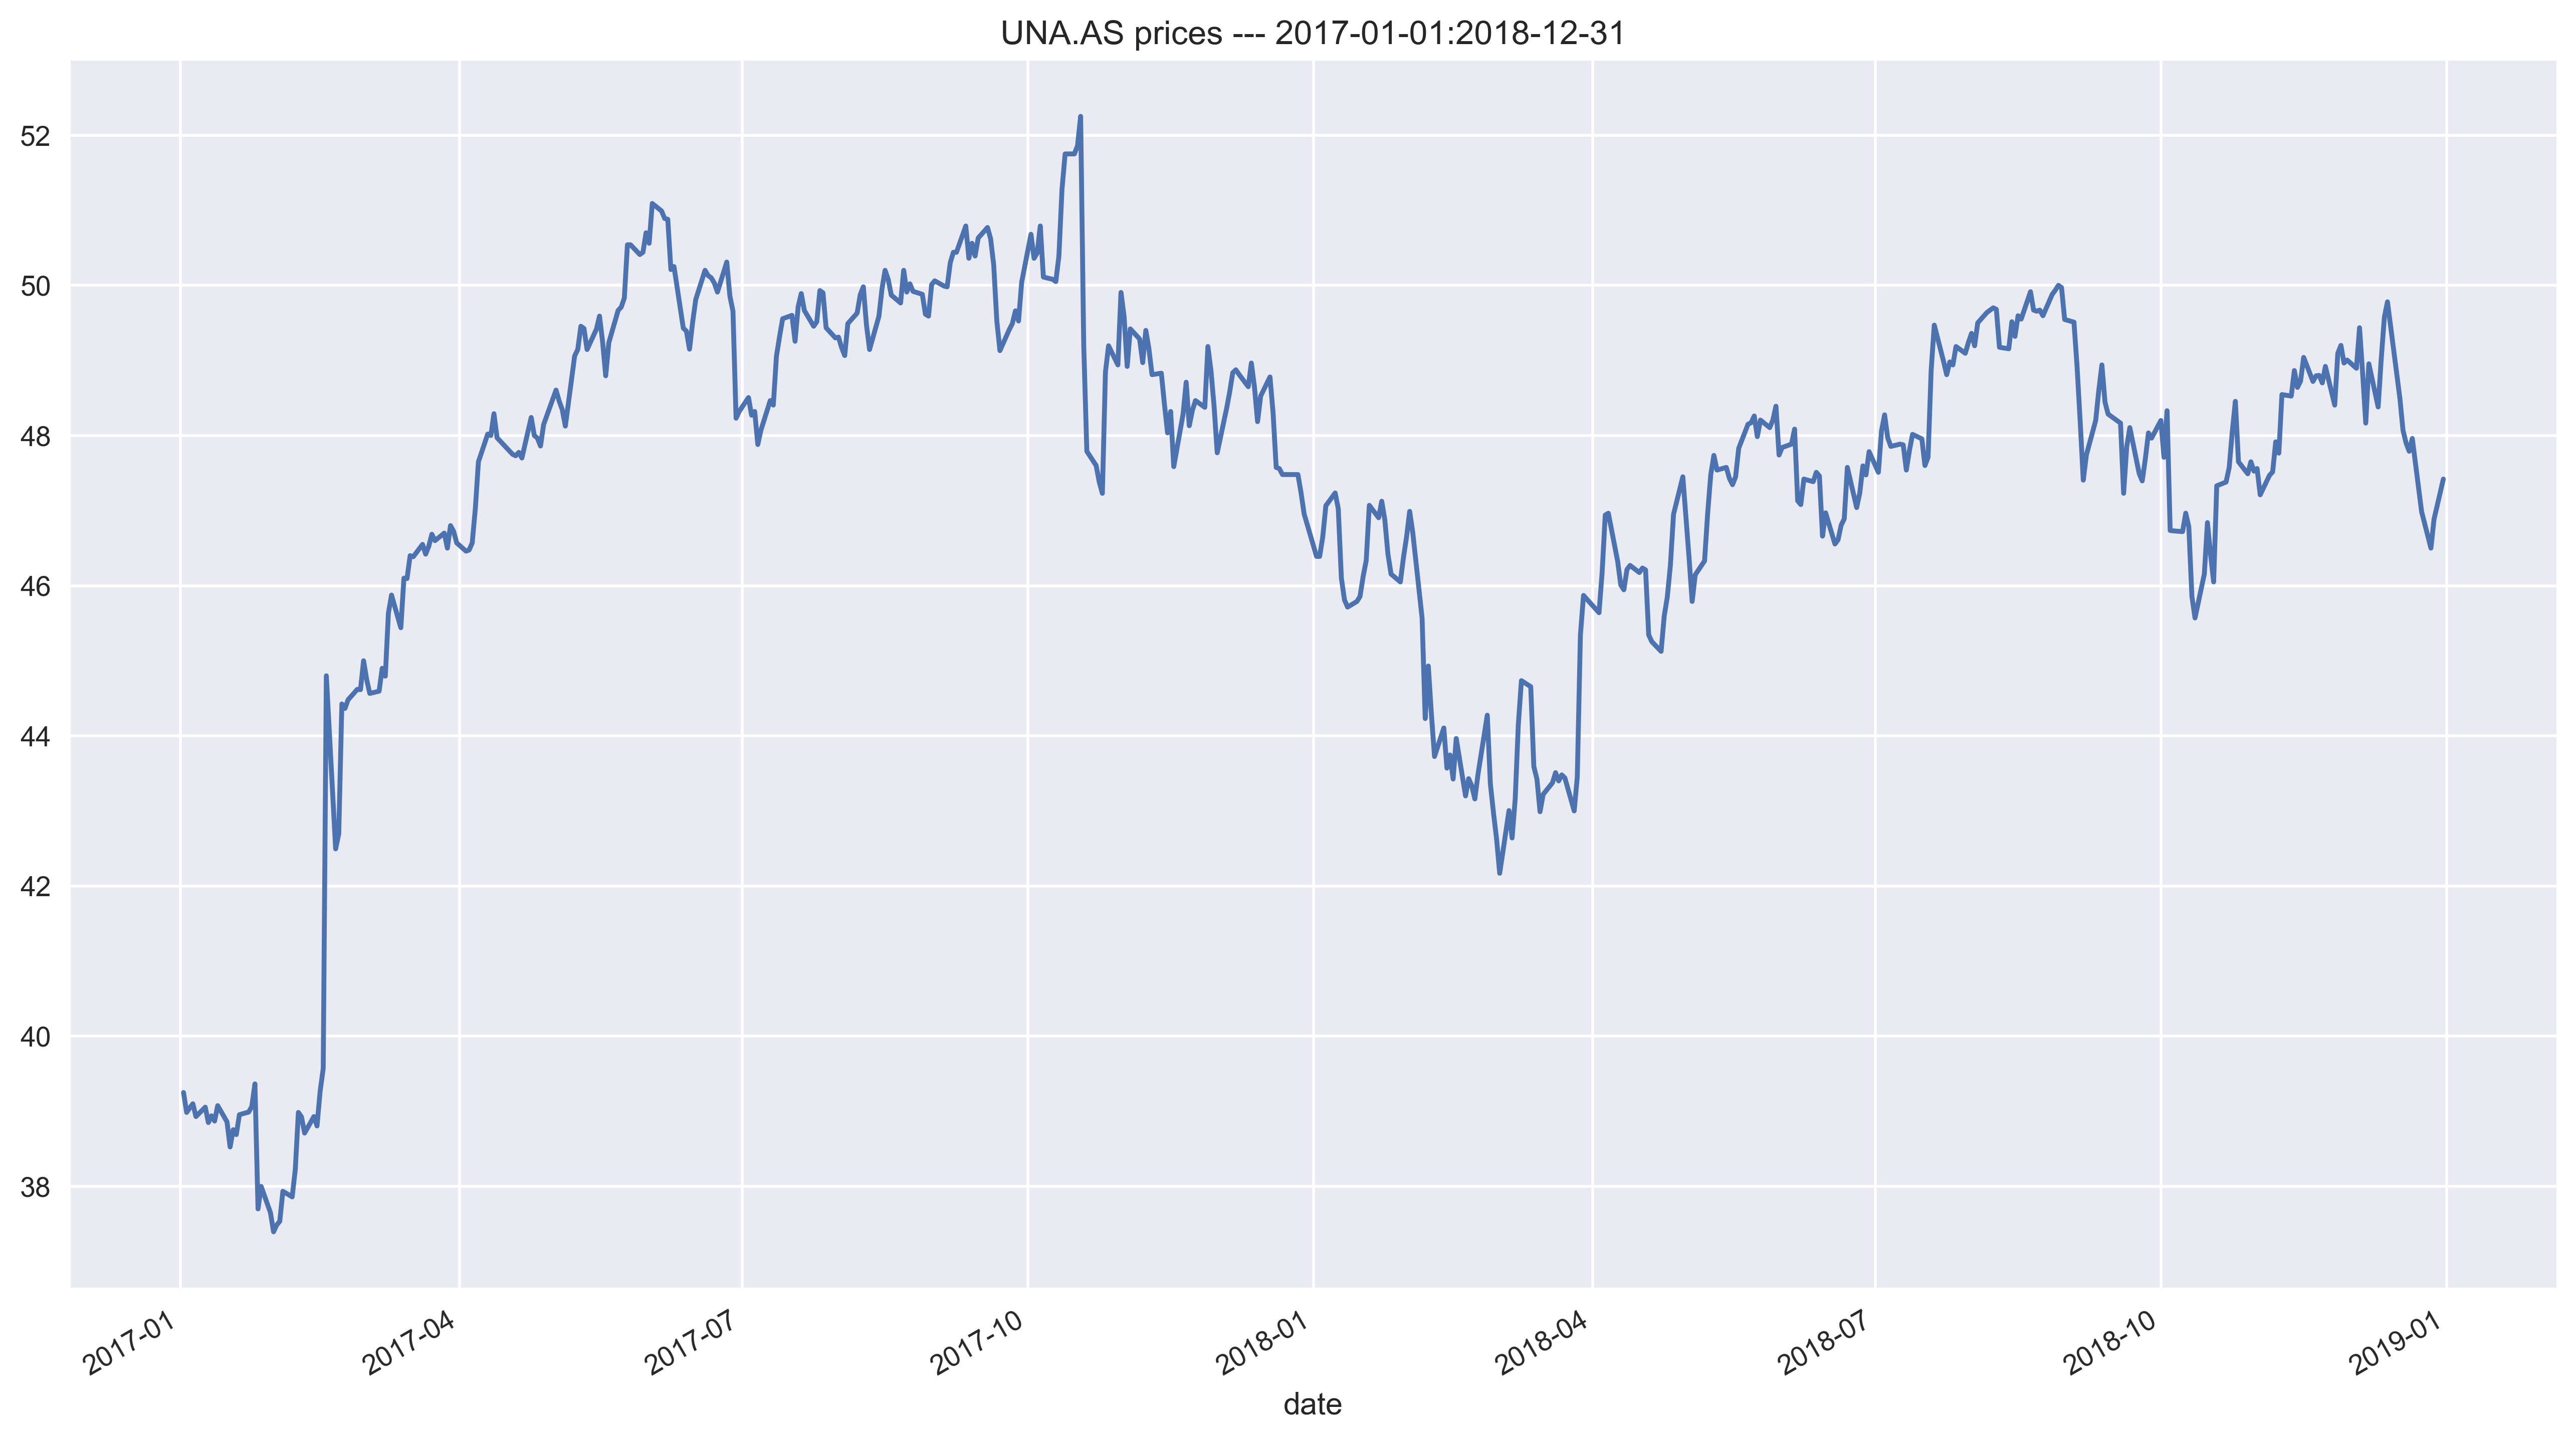

In [6]:
qf.download_csv_data(ticker='UNA.AS', 
                     start_date='2017-01-01', 
                     end_date='2018-12-31', 
                     path='C:/Users/Sela#/Documents/Jupyter Projects/Data/una.csv')

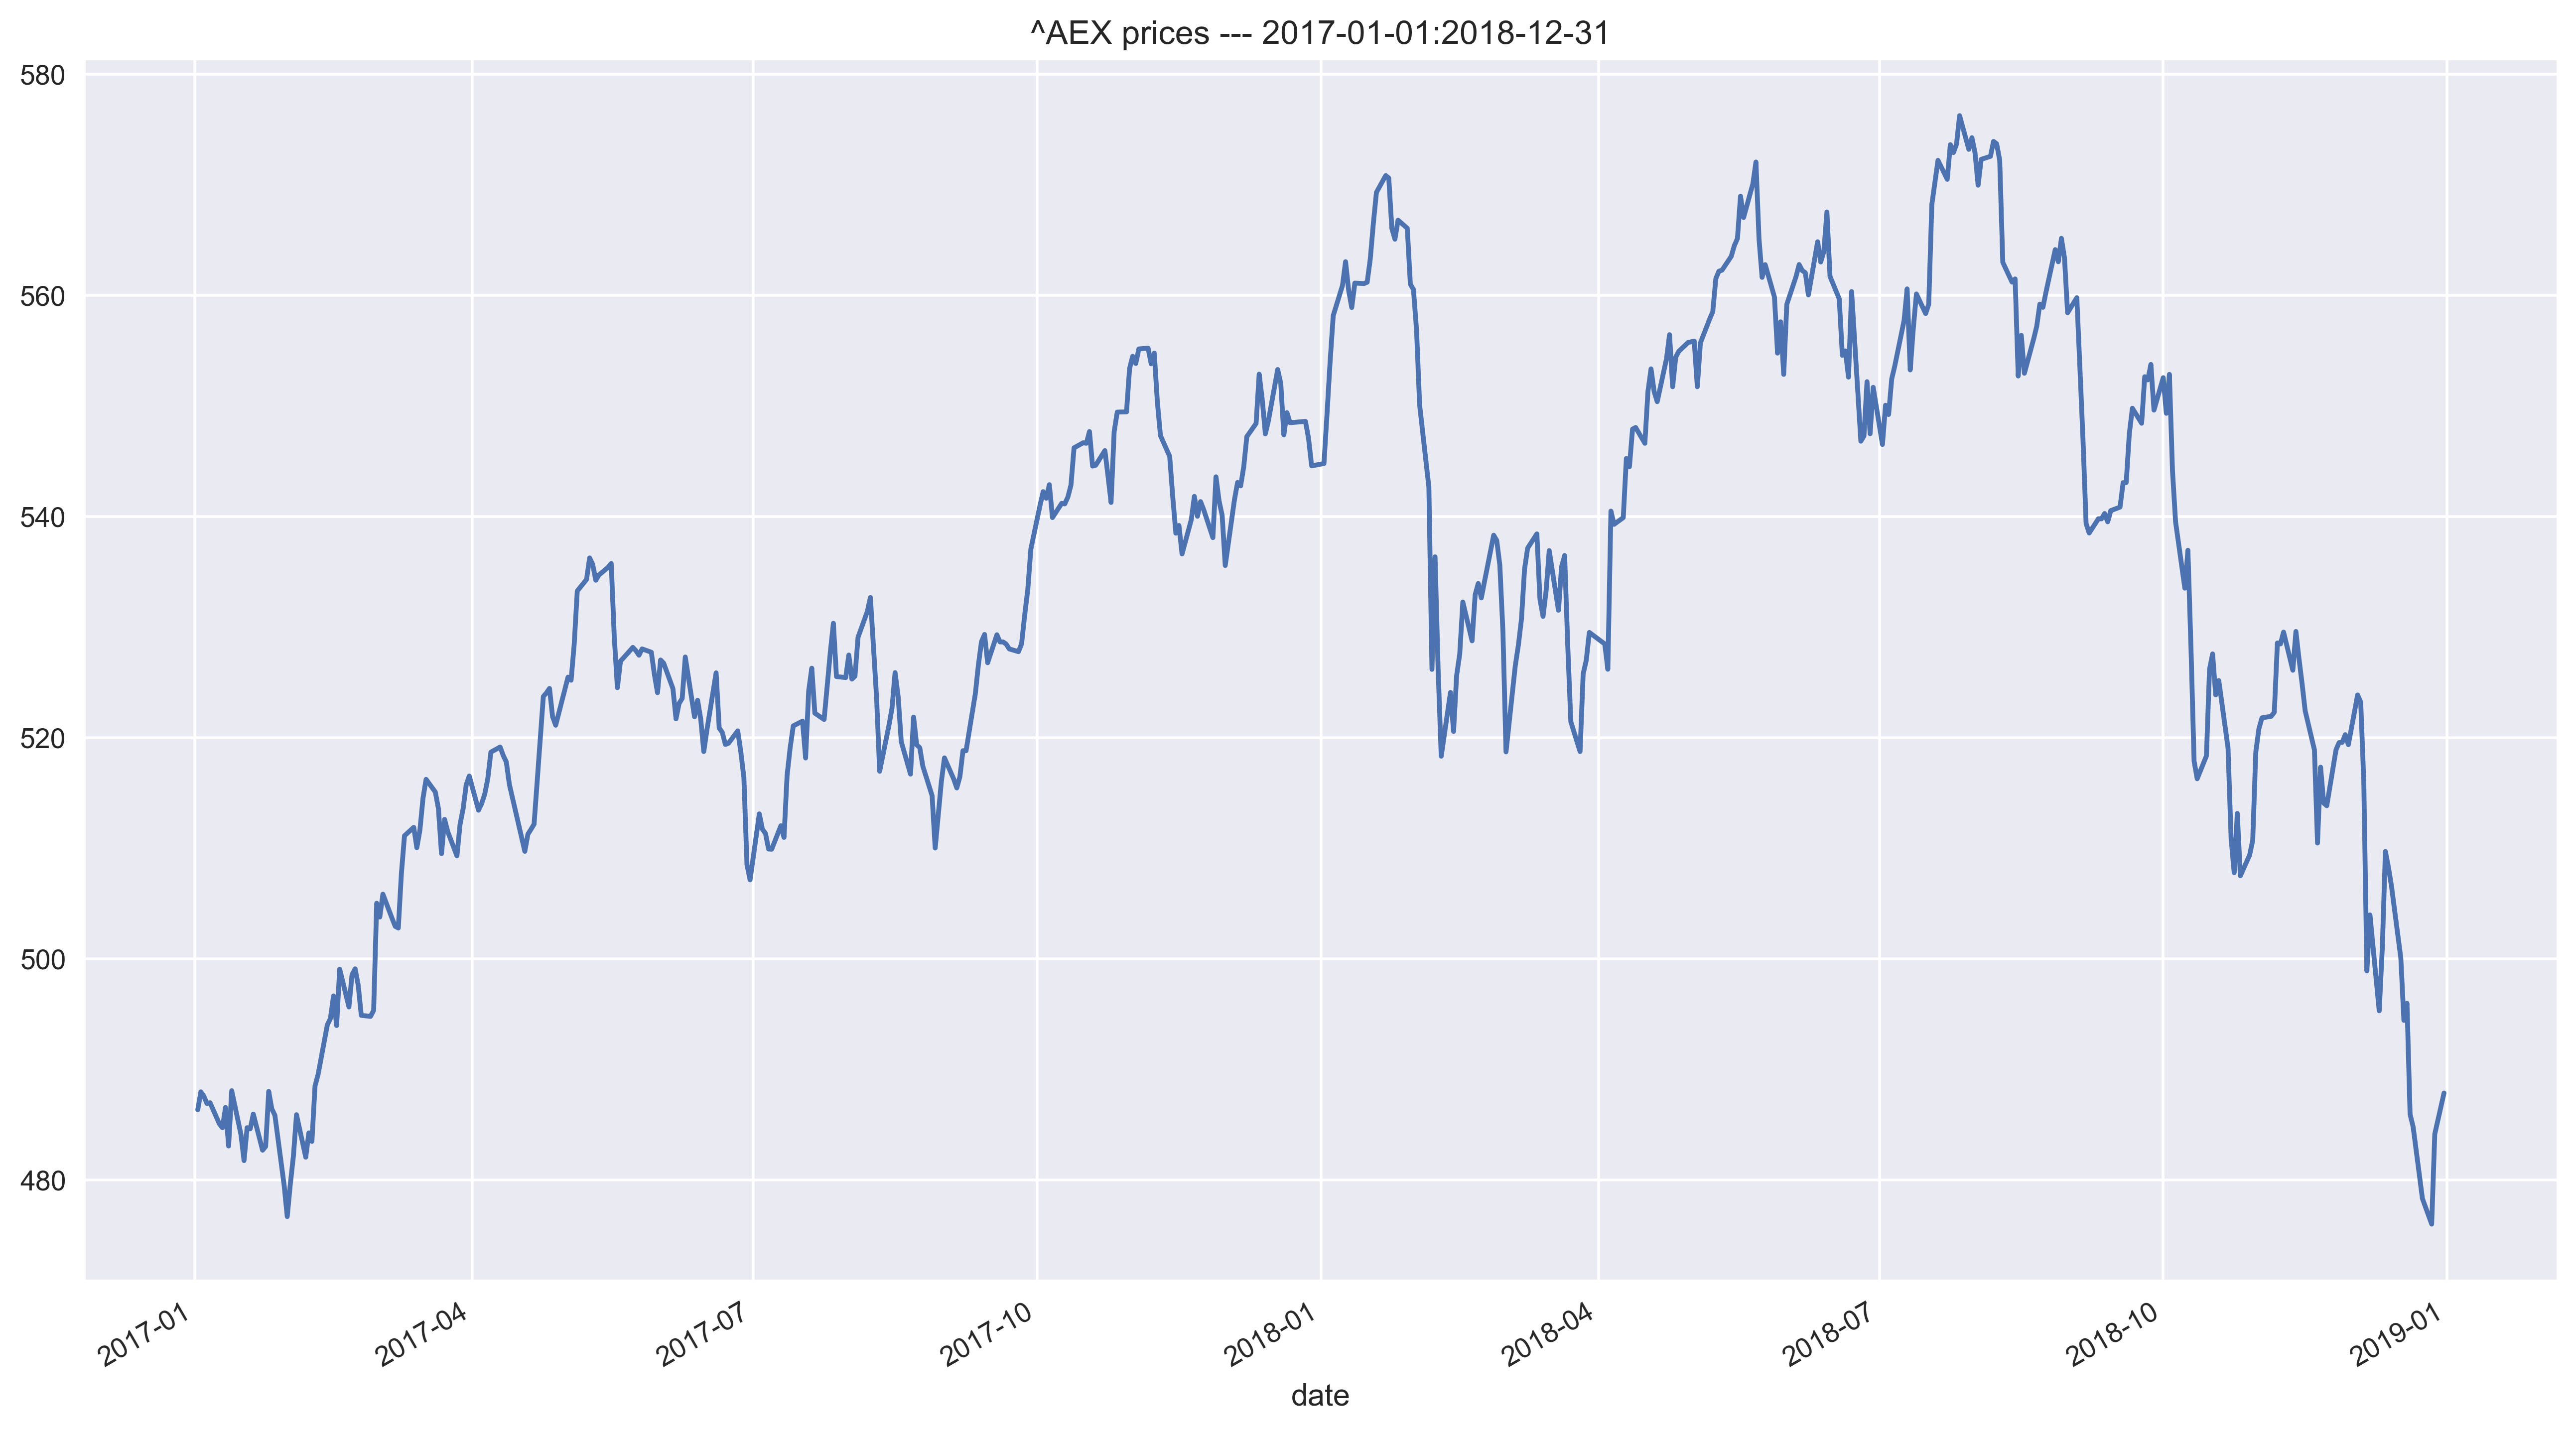

In [7]:
 qf.download_csv_data(ticker='^AEX', 
                     start_date='2017-01-01', 
                     end_date='2018-12-31',
                     path='C:/Users/Sela#/Documents/Jupyter Projects/Data/aex.csv')

In [8]:
# remove the bundle if already ingested
#!zipline clean --bundle eu_stocks --keep-last 0

In [9]:
#zipline ingest --bundle eu_stocks
#!zipline bundles

In [10]:
import os
from zipline.utils.run_algo import load_extensions

load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

In [11]:
from zipline.data import bundles

bundle = bundles.load('eu_stocks_algo')
bundle.asset_finder.retrieve_all(bundle.asset_finder.sids)

[Equity(0 [ABN]), Equity(1 [AEX]), Equity(2 [UNA])]

#  STRATEGIES

In [12]:
%%zipline --start 2018-1-1 --end 2018-12-31 --capital-base 1000.0 -o buy_and_hold.pkl --bundle eu_stocks_algo --trading-calendar XAMS

# imports
from zipline.api import order_percent, symbol, record
from zipline.finance import commission

# parameters
SELECTED_STOCK = 'UNA'

def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.has_ordered = False  
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    
    # trading logic
    if not context.has_ordered:
        order_percent(context.asset, 1)
        context.has_ordered = True
        
    record(price=data.current(context.asset, 'price'))

algo_volatility  algorithm_period_return alpha  \
2018-01-02 16:30:00+00:00              NaN                 0.000000  None   
2018-01-03 16:30:00+00:00         0.005468                -0.000487  None   
2018-01-04 16:30:00+00:00         0.052633                 0.004994  None   
2018-01-05 16:30:00+00:00         0.070149                 0.013688  None   
2018-01-08 16:30:00+00:00         0.060758                 0.017279  None   
2018-01-09 16:30:00+00:00         0.074100                 0.012869  None   
2018-01-10 16:30:00+00:00         0.144817                -0.006577  None   
2018-01-11 16:30:00+00:00         0.137218                -0.012646  None   
2018-01-12 16:30:00+00:00         0.128379                -0.014641  None   
2018-01-15 16:30:00+00:00         0.122103                -0.013066  None   
2018-01-16 16:30:00+00:00         0.116529                -0.011722  None   
2018-01-17 16:30:00+00:00         0.115243                -0.006157  None   
2018-01-18 16:30:00+00:00         0.112540                -0.001642  None   
2018-01-19 16:30:00+00:00         0.126693                 0.013793  None   
2018-01-22 16:30:00+00:00         0.123425                 0.010328  None   
2018-01-23 16:30:00+00:00         0.120230                 0.014969  None   
2018-01-24 16:30:00+00:00         0.118779                 0.009719  None   
2018-01-25 16:30:00+00:00         0.121247                 0.000143  None   
2018-01-26 16:30:00+00:00         0.119583                -0.005422  None   
2018-01-29 16:30:00+00:00         0.116601                -0.007627  None   
2018-01-30 16:30:00+00:00         0.116395                -0.000781  None   
2018-01-31 16:30:00+00:00         0.115268                 0.004994  None   
2018-02-01 16:30:00+00:00         0.114880                 0.012134  None   
2018-02-02 16:30:00+00:00         0.114290                 0.006149  None   
2018-02-05 16:30:00+00:00         0.135349                -0.017707  None   
2018-02-06 16:30:00+00:00         0.158644                -0.045847  None   
2018-02-07 16:30:00+00:00         0.164182                -0.031126  None   
2018-02-08 16:30:00+00:00         0.165594                -0.044566  None   
2018-02-09 16:30:00+00:00         0.165735                -0.056452  None   
2018-02-12 16:30:00+00:00         0.165621                -0.048472  None   
...                                    ...                      ...   ...   
2018-11-16 16:30:00+00:00         0.152205                 0.055184  None   
2018-11-19 16:30:00+00:00         0.152029                 0.048464  None   
2018-11-20 16:30:00+00:00         0.151699                 0.050018  None   
2018-11-21 16:30:00+00:00         0.151367                 0.050123  None   
2018-11-22 16:30:00+00:00         0.151054                 0.048044  None   
2018-11-23 16:30:00+00:00         0.150787                 0.052643  None   
2018-11-26 16:30:00+00:00         0.150861                 0.041828  None   
2018-11-27 16:30:00+00:00         0.151209                 0.056339  None   
2018-11-28 16:30:00+00:00         0.150896                 0.058544  None   
2018-11-29 16:30:00+00:00         0.150660                 0.053609  None   
2018-11-30 16:30:00+00:00         0.150340                 0.054449  None   
2018-12-03 16:30:00+00:00         0.150043                 0.052139  None   
2018-12-04 16:30:00+00:00         0.150117                 0.063479  None   
2018-12-05 16:30:00+00:00         0.150328                 0.050774  None   
2018-12-06 16:30:00+00:00         0.150654                 0.036809  None   
2018-12-07 16:30:00+00:00         0.151206                 0.053399  None   
2018-12-10 16:30:00+00:00         0.151365                 0.041324  None   
2018-12-11 16:30:00+00:00         0.151613                 0.054869  None   
2018-12-12 16:30:00+00:00         0.151690                 0.066419  None   
2018-12-13 16:30:00+00:00         0.151426                 0.070703  None   
2018-12-14 16:30:00+00:

In [13]:
buy_and_hold_results = pd.read_pickle('buy_and_hold.pkl')

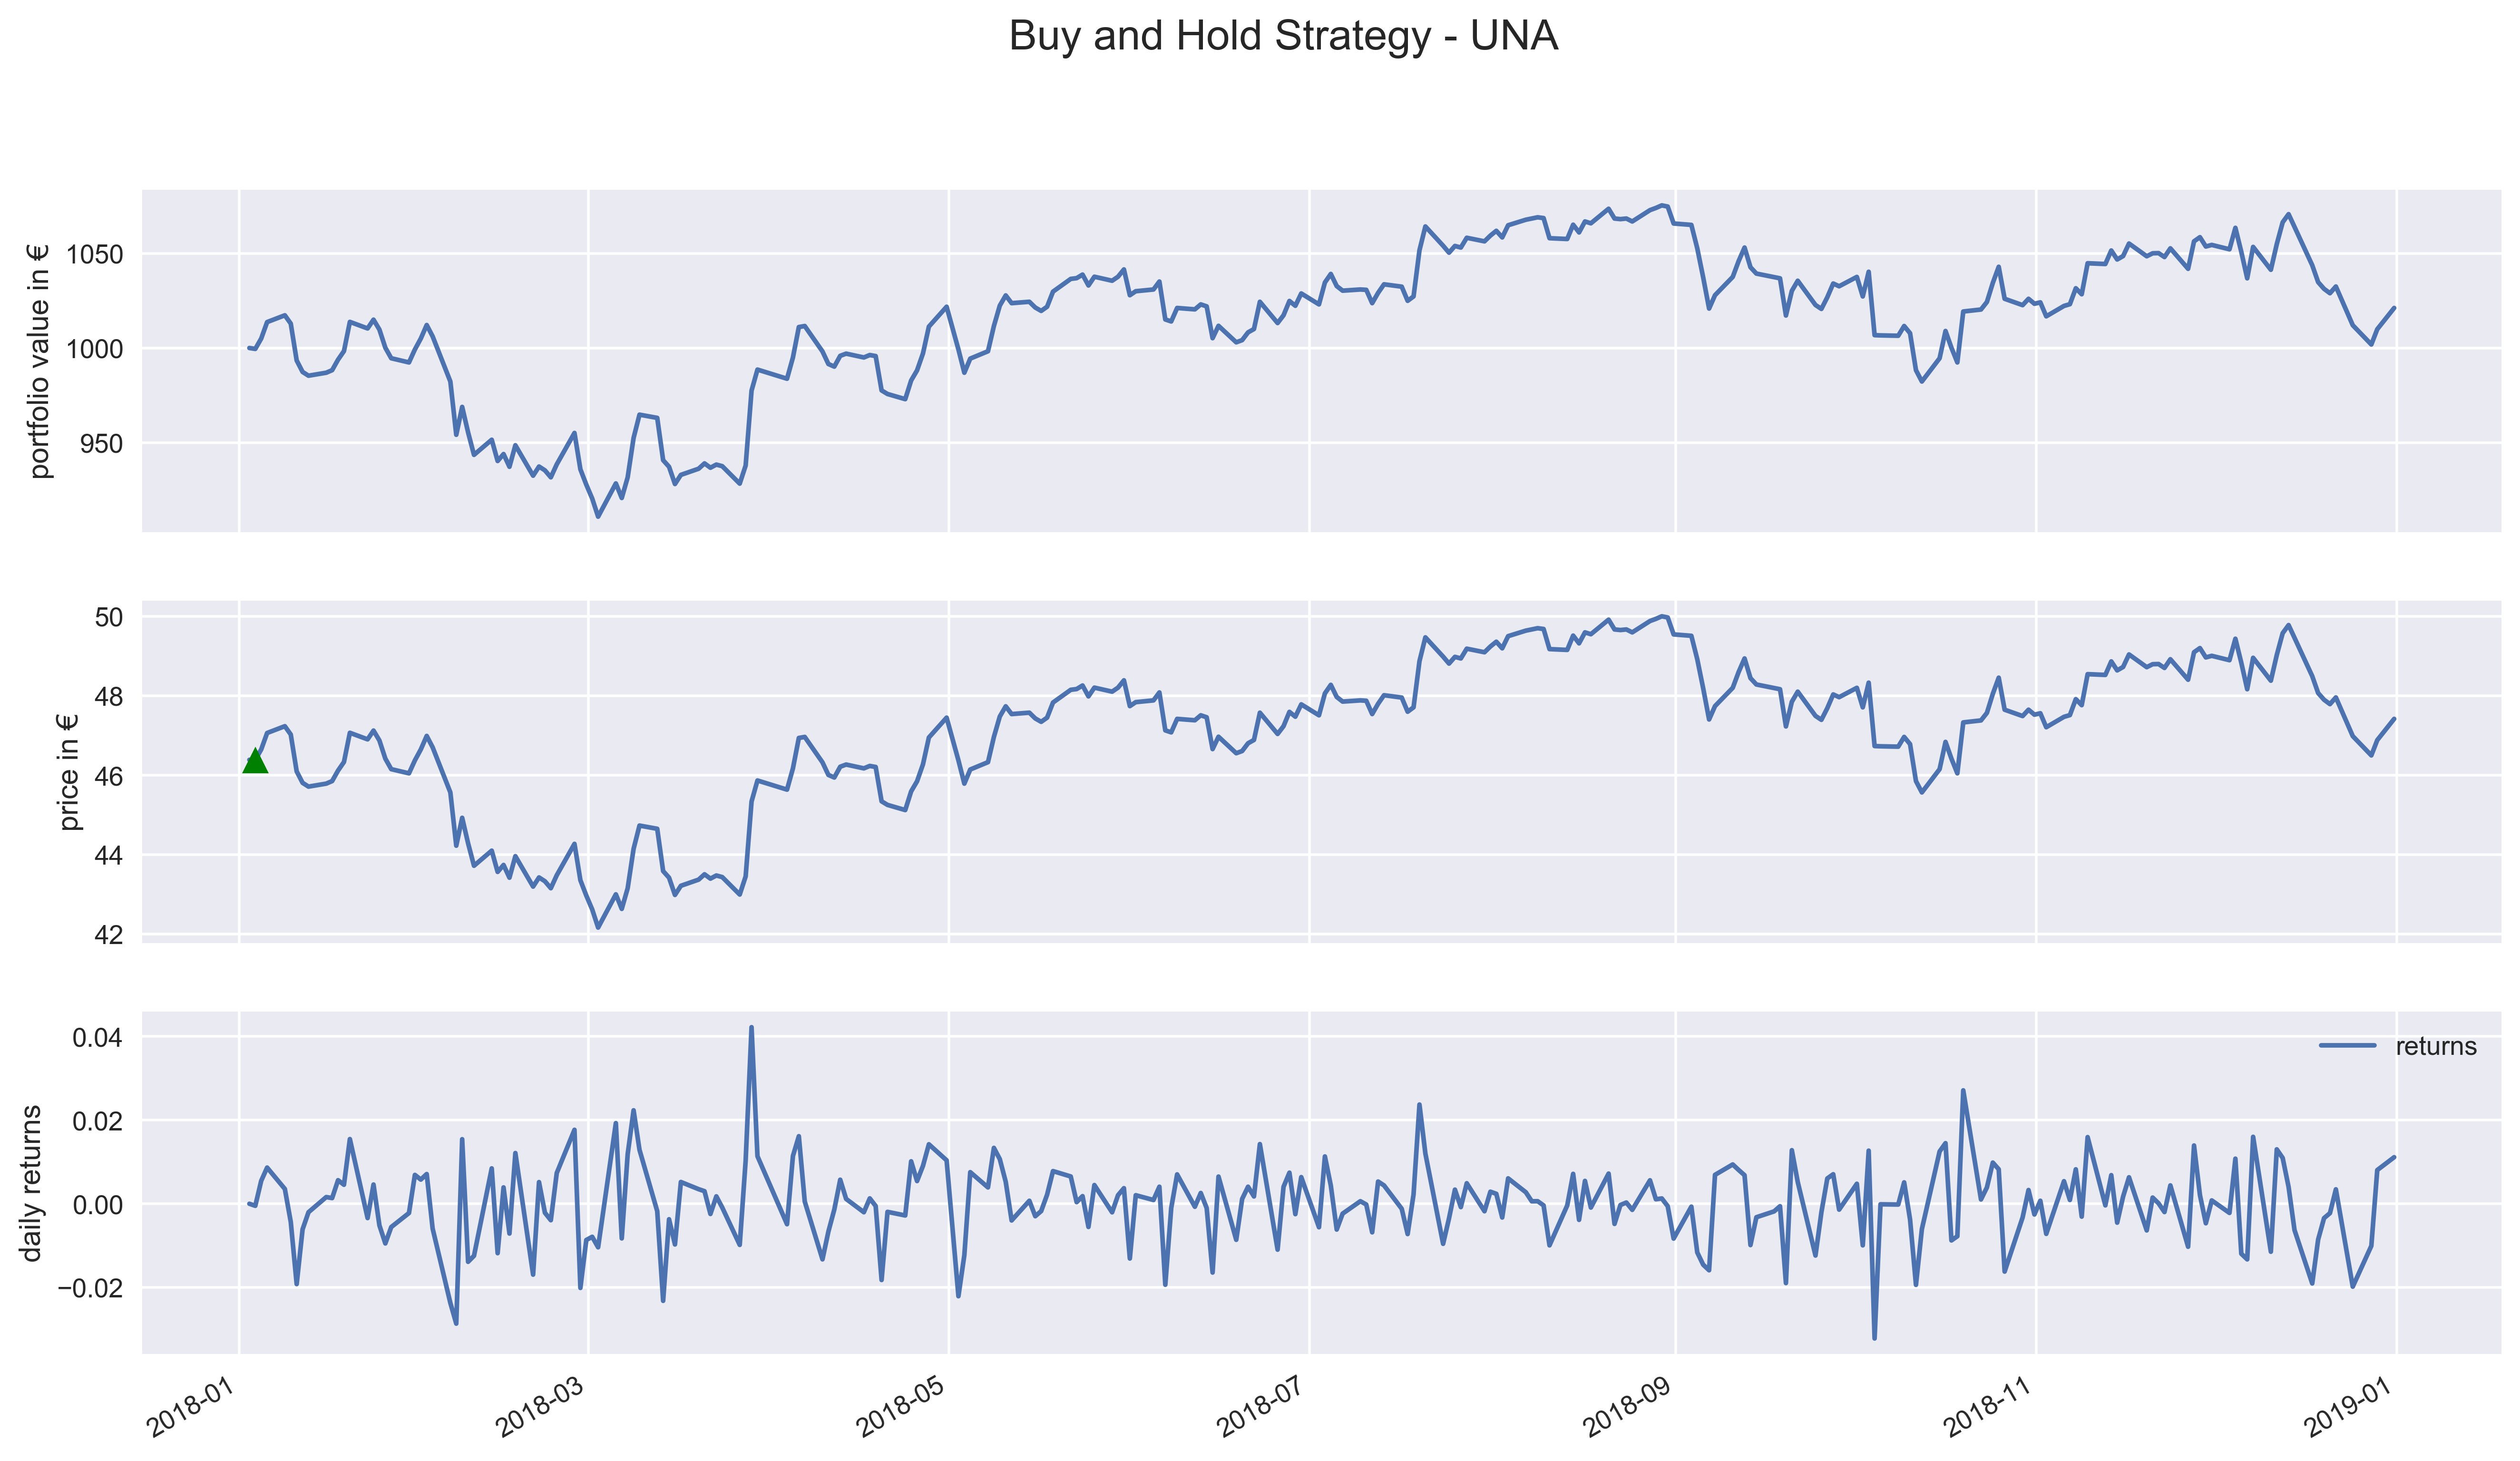

Final portfolio value (including cash): 1021.14€


In [14]:
qf.visualize_results(buy_and_hold_results, 'Buy and Hold Strategy - UNA', '€')

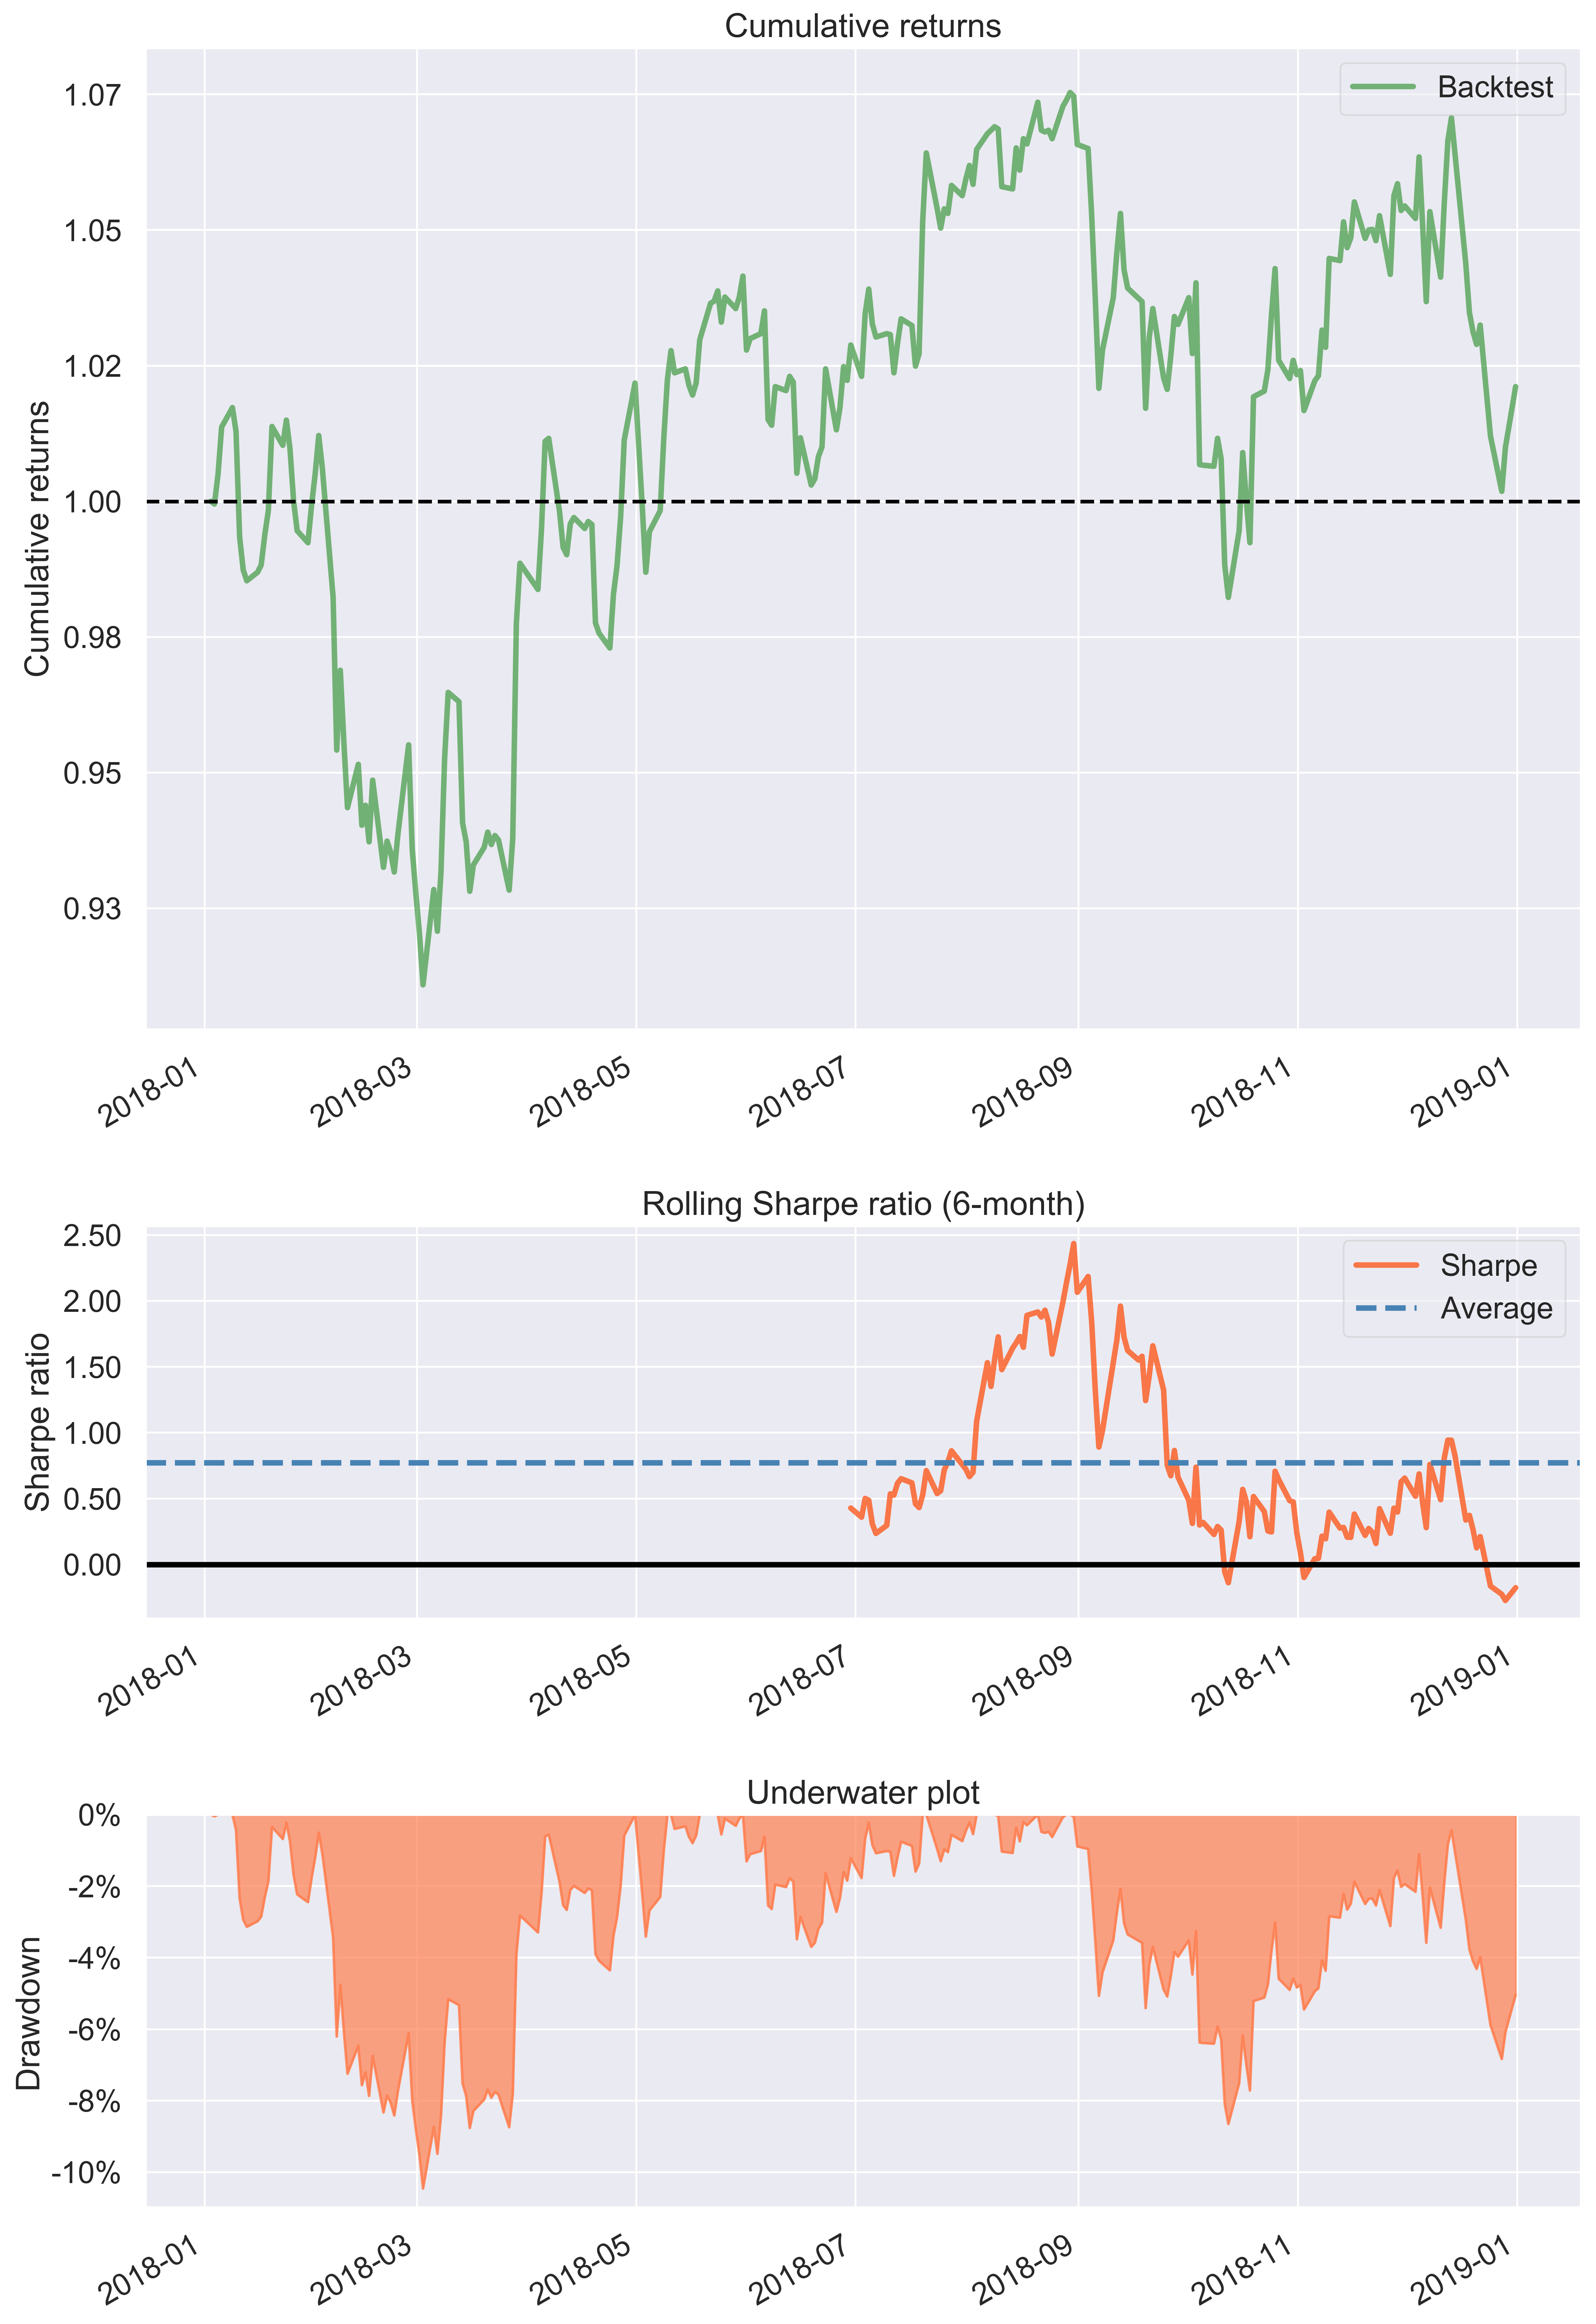

In [15]:
# possible additional summary statistics
pf.create_simple_tear_sheet(buy_and_hold_results.returns)

In [16]:
buy_and_hold_perf = qf.get_performance_summary(buy_and_hold_results.returns)

In [17]:
%%zipline --start 2018-1-1 --end 2018-12-31 --capital-base 1000.0 -o simple_moving_average.pkl --bundle eu_stocks_algo --trading-calendar XAMS

# imports 
from zipline.api import order_percent, record, symbol, order_target
from zipline.finance import commission

# parameters 
MA_PERIODS = 20
SELECTED_STOCK = 'UNA'

def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = False

def handle_data(context, data):
    
    price_history = data.history(context.asset, fields="price", bar_count=MA_PERIODS, frequency="1d")
    ma = price_history.mean()
    
    # cross up
    if (price_history[-2] < ma) & (price_history[-1] > ma) & (not context.has_position):
        order_percent(context.asset, 1.0)
        context.has_position = True
    # cross down
    elif (price_history[-2] > ma) & (price_history[-1] < ma) & (context.has_position):
        order_target(context.asset, 0)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           moving_average=ma)

C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,


algo_volatility  algorithm_period_return alpha  \
2018-01-02 16:30:00+00:00              NaN                 0.000000  None   
2018-01-03 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-04 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-05 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-08 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-09 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-10 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-11 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-12 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-15 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-16 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-17 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-18 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-19 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-22 16:30:00+00:00         0.002019                -0.000492  None   
2018-01-23 16:30:00+00:00         0.018660                 0.004149  None   
2018-01-24 16:30:00+00:00         0.027800                -0.001101  None   
2018-01-25 16:30:00+00:00         0.044688                -0.010677  None   
2018-01-26 16:30:00+00:00         0.047860                -0.016727  None   
2018-01-29 16:30:00+00:00         0.046689                -0.016727  None   
2018-01-30 16:30:00+00:00         0.045600                -0.016727  None   
2018-01-31 16:30:00+00:00         0.044583                -0.016727  None   
2018-02-01 16:30:00+00:00         0.043566                -0.017221  None   
2018-02-02 16:30:00+00:00         0.045986                -0.023206  None   
2018-02-05 16:30:00+00:00         0.087001                -0.047062  None   
2018-02-06 16:30:00+00:00         0.122157                -0.075666  None   
2018-02-07 16:30:00+00:00         0.120134                -0.075666  None   
2018-02-08 16:30:00+00:00         0.118205                -0.075666  None   
2018-02-09 16:30:00+00:00         0.116363                -0.075666  None   
2018-02-12 16:30:00+00:00         0.114604                -0.075666  None   
...                                    ...                      ...   ...   
2018-11-16 16:30:00+00:00         0.096299                -0.046732  None   
2018-11-19 16:30:00+00:00         0.096307                -0.052812  None   
2018-11-20 16:30:00+00:00         0.096111                -0.051406  None   
2018-11-21 16:30:00+00:00         0.095901                -0.051311  None   
2018-11-22 16:30:00+00:00         0.095709                -0.053192  None   
2018-11-23 16:30:00+00:00         0.095622                -0.049031  None   
2018-11-26 16:30:00+00:00         0.095993                -0.058816  None   
2018-11-27 16:30:00+00:00         0.096916                -0.045687  None   
2018-11-28 16:30:00+00:00         0.096737                -0.043692  None   
2018-11-29 16:30:00+00:00         0.096642                -0.048157  None   
2018-11-30 16:30:00+00:00         0.096442                -0.047397  None   
2018-12-03 16:30:00+00:00         0.096259                -0.049487  None   
2018-12-04 16:30:00+00:00         0.096720                -0.039227  None   
2018-12-05 16:30:00+00:00         0.097276                -0.050722  None   
2018-12-06 16:30:00+00:00         0.097997                -0.063357  None   
2018-12-07 16:30:00+00:00         0.099116                -0.048812  None   
2018-12-10 16:30:00+00:00         0.098910                -0.049272  None   
2018-12-11 16:30:00+00:00         0.099535                -0.037482  None   
2018-12-12 16:30:00+00:00         0.099330                -0.037953  None   
2018-12-13 16:30:00+00:00         0.099217                -0.034077  None   
2018-12-14 16:30:00+00:

In [18]:
sma_results = pd.read_pickle('simple_moving_average.pkl')

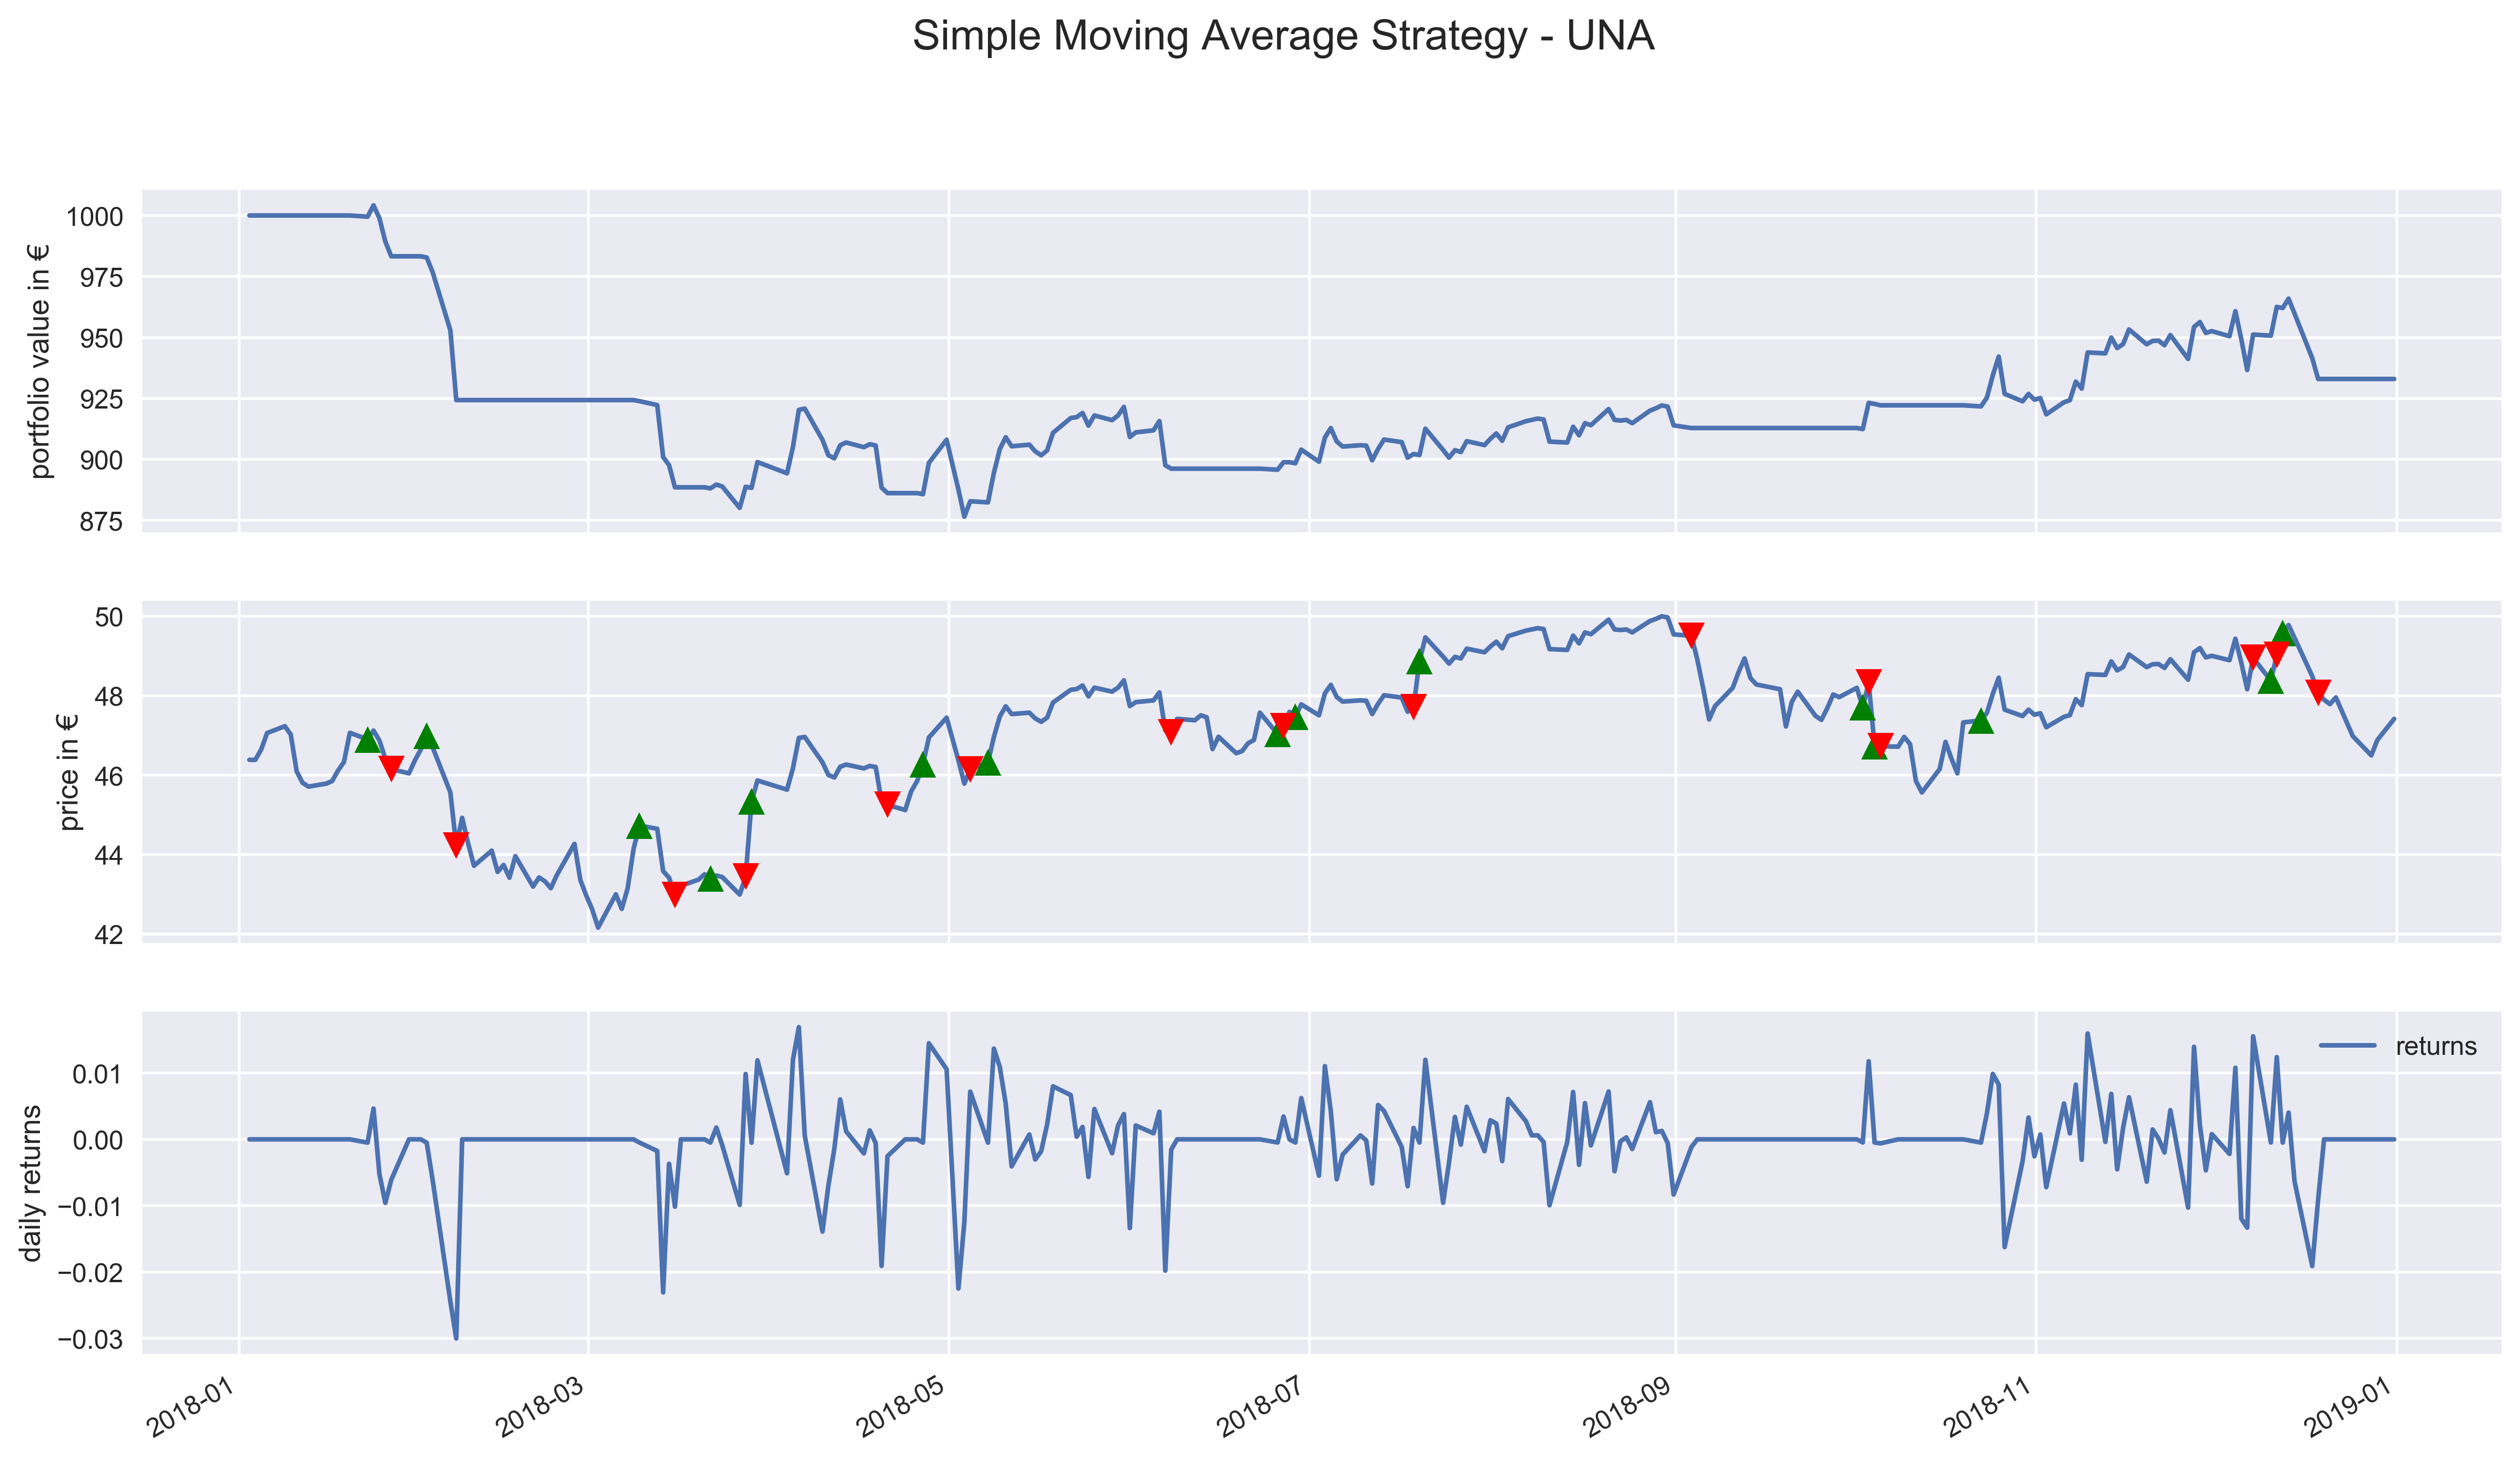

Final portfolio value (including cash): 932.98€


In [19]:
qf.visualize_results(sma_results, 'Simple Moving Average Strategy - UNA', '€')

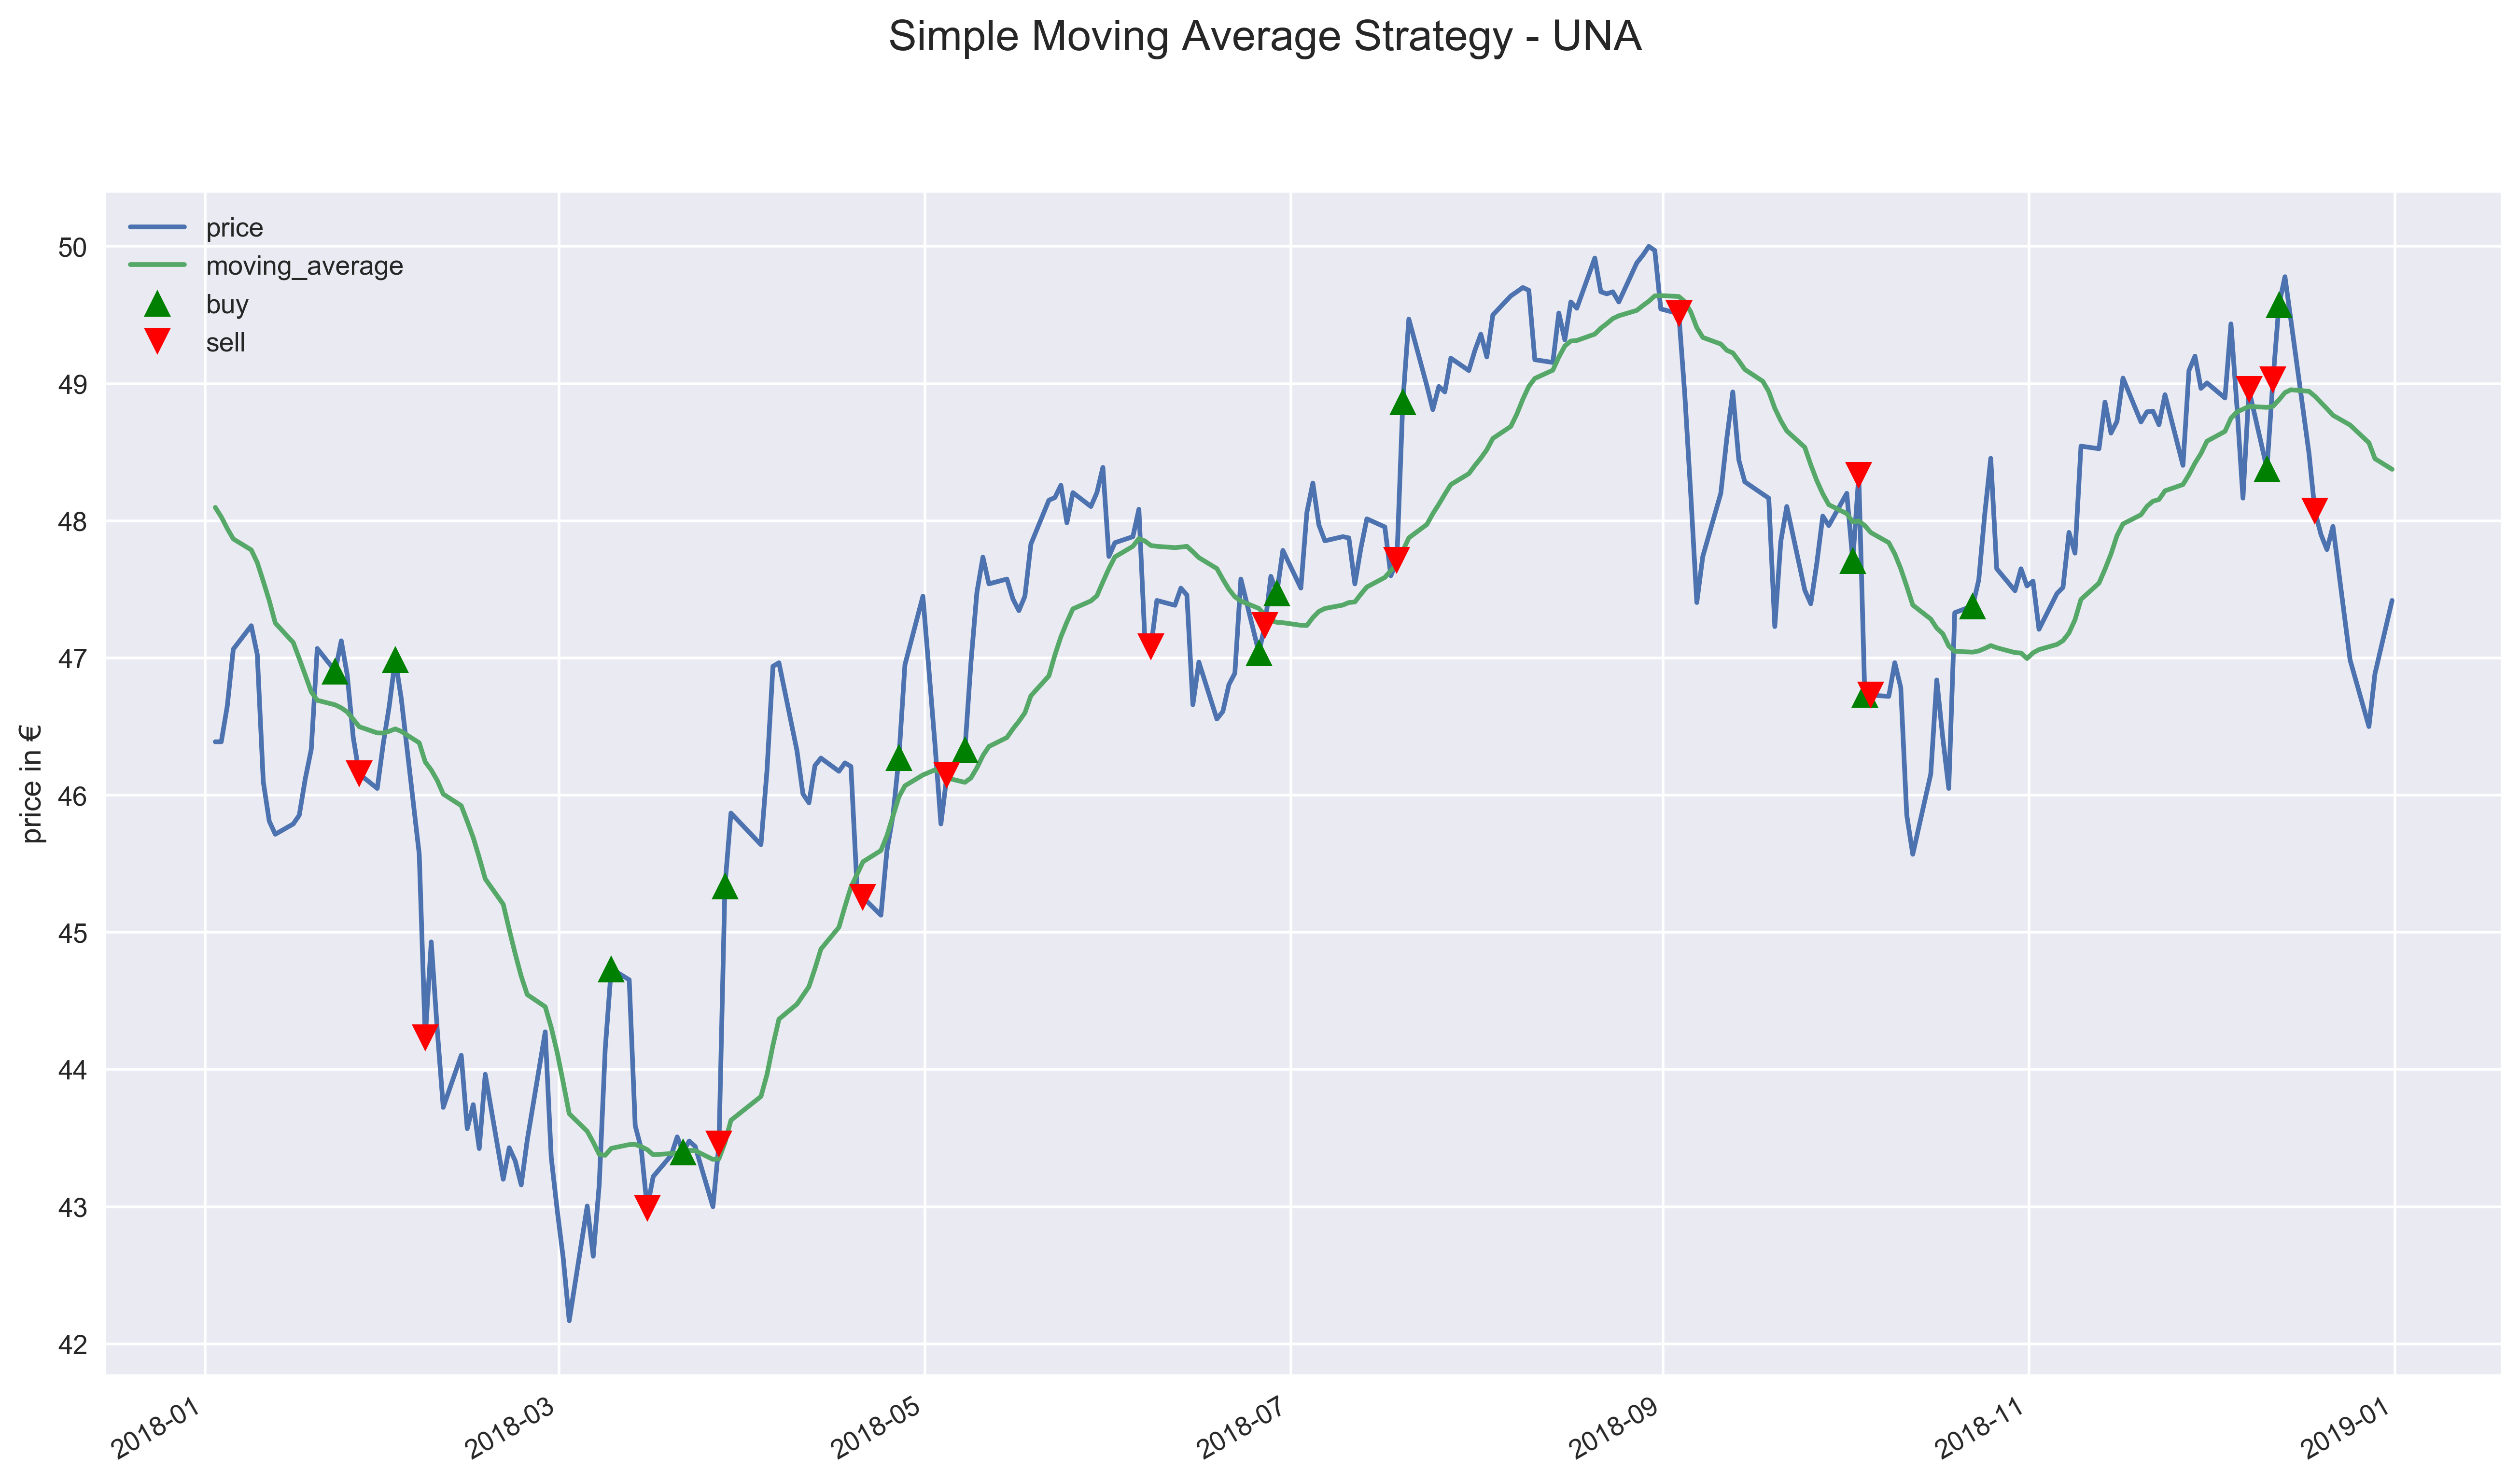

In [20]:
fig, ax = plt.subplots()

# asset
sma_results[['price', 'moving_average']].plot(ax=ax)
ax.set_ylabel('price in €')

# mark transactions
perf_trans = sma_results.loc[[t != [] for t in sma_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, sma_results.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax.plot(sells.index, sma_results.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax.legend()

fig.suptitle('Simple Moving Average Strategy - UNA', fontsize=16)
plt.legend()
plt.show()

In [21]:
%%zipline --start 2018-1-1 --end 2018-12-31 --capital-base 1000.0 -o moving_average_crossover.pkl --bundle eu_stocks_algo --trading-calendar XAMS

# imports 
from zipline.api import order_percent, record, symbol, order_target
from zipline.finance import commission

# parameters 
SELECTED_STOCK = 'UNA'
SLOW_MA_PERIODS = 100
FAST_MA_PERIODS = 20

def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = False
    
def handle_data(context, data):

    fast_ma = data.history(context.asset, 'price', bar_count=FAST_MA_PERIODS, frequency="1d").mean()
    slow_ma = data.history(context.asset, 'price', bar_count=SLOW_MA_PERIODS, frequency="1d").mean()

    # Trading logic
    if (fast_ma > slow_ma) & (not context.has_position):
        order_percent(context.asset, 1.0)
        context.has_position = True
    elif (fast_ma < slow_ma) & (context.has_position):
        order_target(context.asset, 0)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           fast_ma=fast_ma,
           slow_ma=slow_ma)

C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


algo_volatility  algorithm_period_return alpha  \
2018-01-02 16:30:00+00:00              NaN                 0.000000  None   
2018-01-03 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-04 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-05 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-08 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-09 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-10 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-11 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-12 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-15 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-16 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-17 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-18 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-19 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-22 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-23 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-24 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-25 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-26 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-29 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-30 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-31 16:30:00+00:00         0.000000                 0.000000  None   
2018-02-01 16:30:00+00:00         0.000000                 0.000000  None   
2018-02-02 16:30:00+00:00         0.000000                 0.000000  None   
2018-02-05 16:30:00+00:00         0.000000                 0.000000  None   
2018-02-06 16:30:00+00:00         0.000000                 0.000000  None   
2018-02-07 16:30:00+00:00         0.000000                 0.000000  None   
2018-02-08 16:30:00+00:00         0.000000                 0.000000  None   
2018-02-09 16:30:00+00:00         0.000000                 0.000000  None   
2018-02-12 16:30:00+00:00         0.000000                 0.000000  None   
...                                    ...                      ...   ...   
2018-11-16 16:30:00+00:00         0.084528                 0.044899  None   
2018-11-19 16:30:00+00:00         0.084341                 0.044899  None   
2018-11-20 16:30:00+00:00         0.084156                 0.044899  None   
2018-11-21 16:30:00+00:00         0.083971                 0.044899  None   
2018-11-22 16:30:00+00:00         0.083788                 0.044899  None   
2018-11-23 16:30:00+00:00         0.083606                 0.044899  None   
2018-11-26 16:30:00+00:00         0.083425                 0.044899  None   
2018-11-27 16:30:00+00:00         0.083245                 0.044899  None   
2018-11-28 16:30:00+00:00         0.083067                 0.044899  None   
2018-11-29 16:30:00+00:00         0.082892                 0.044385  None   
2018-11-30 16:30:00+00:00         0.082718                 0.045225  None   
2018-12-03 16:30:00+00:00         0.082580                 0.042915  None   
2018-12-04 16:30:00+00:00         0.083135                 0.054255  None   
2018-12-05 16:30:00+00:00         0.083914                 0.041550  None   
2018-12-06 16:30:00+00:00         0.084889                 0.027585  None   
2018-12-07 16:30:00+00:00         0.086281                 0.044175  None   
2018-12-10 16:30:00+00:00         0.086934                 0.032100  None   
2018-12-11 16:30:00+00:00         0.087755                 0.045645  None   
2018-12-12 16:30:00+00:00         0.088265                 0.057195  None   
2018-12-13 16:30:00+00:00         0.088169                 0.061479  None   
2018-12-14 16:30:00+00:

In [22]:
mac_results = pd.read_pickle('moving_average_crossover.pkl')

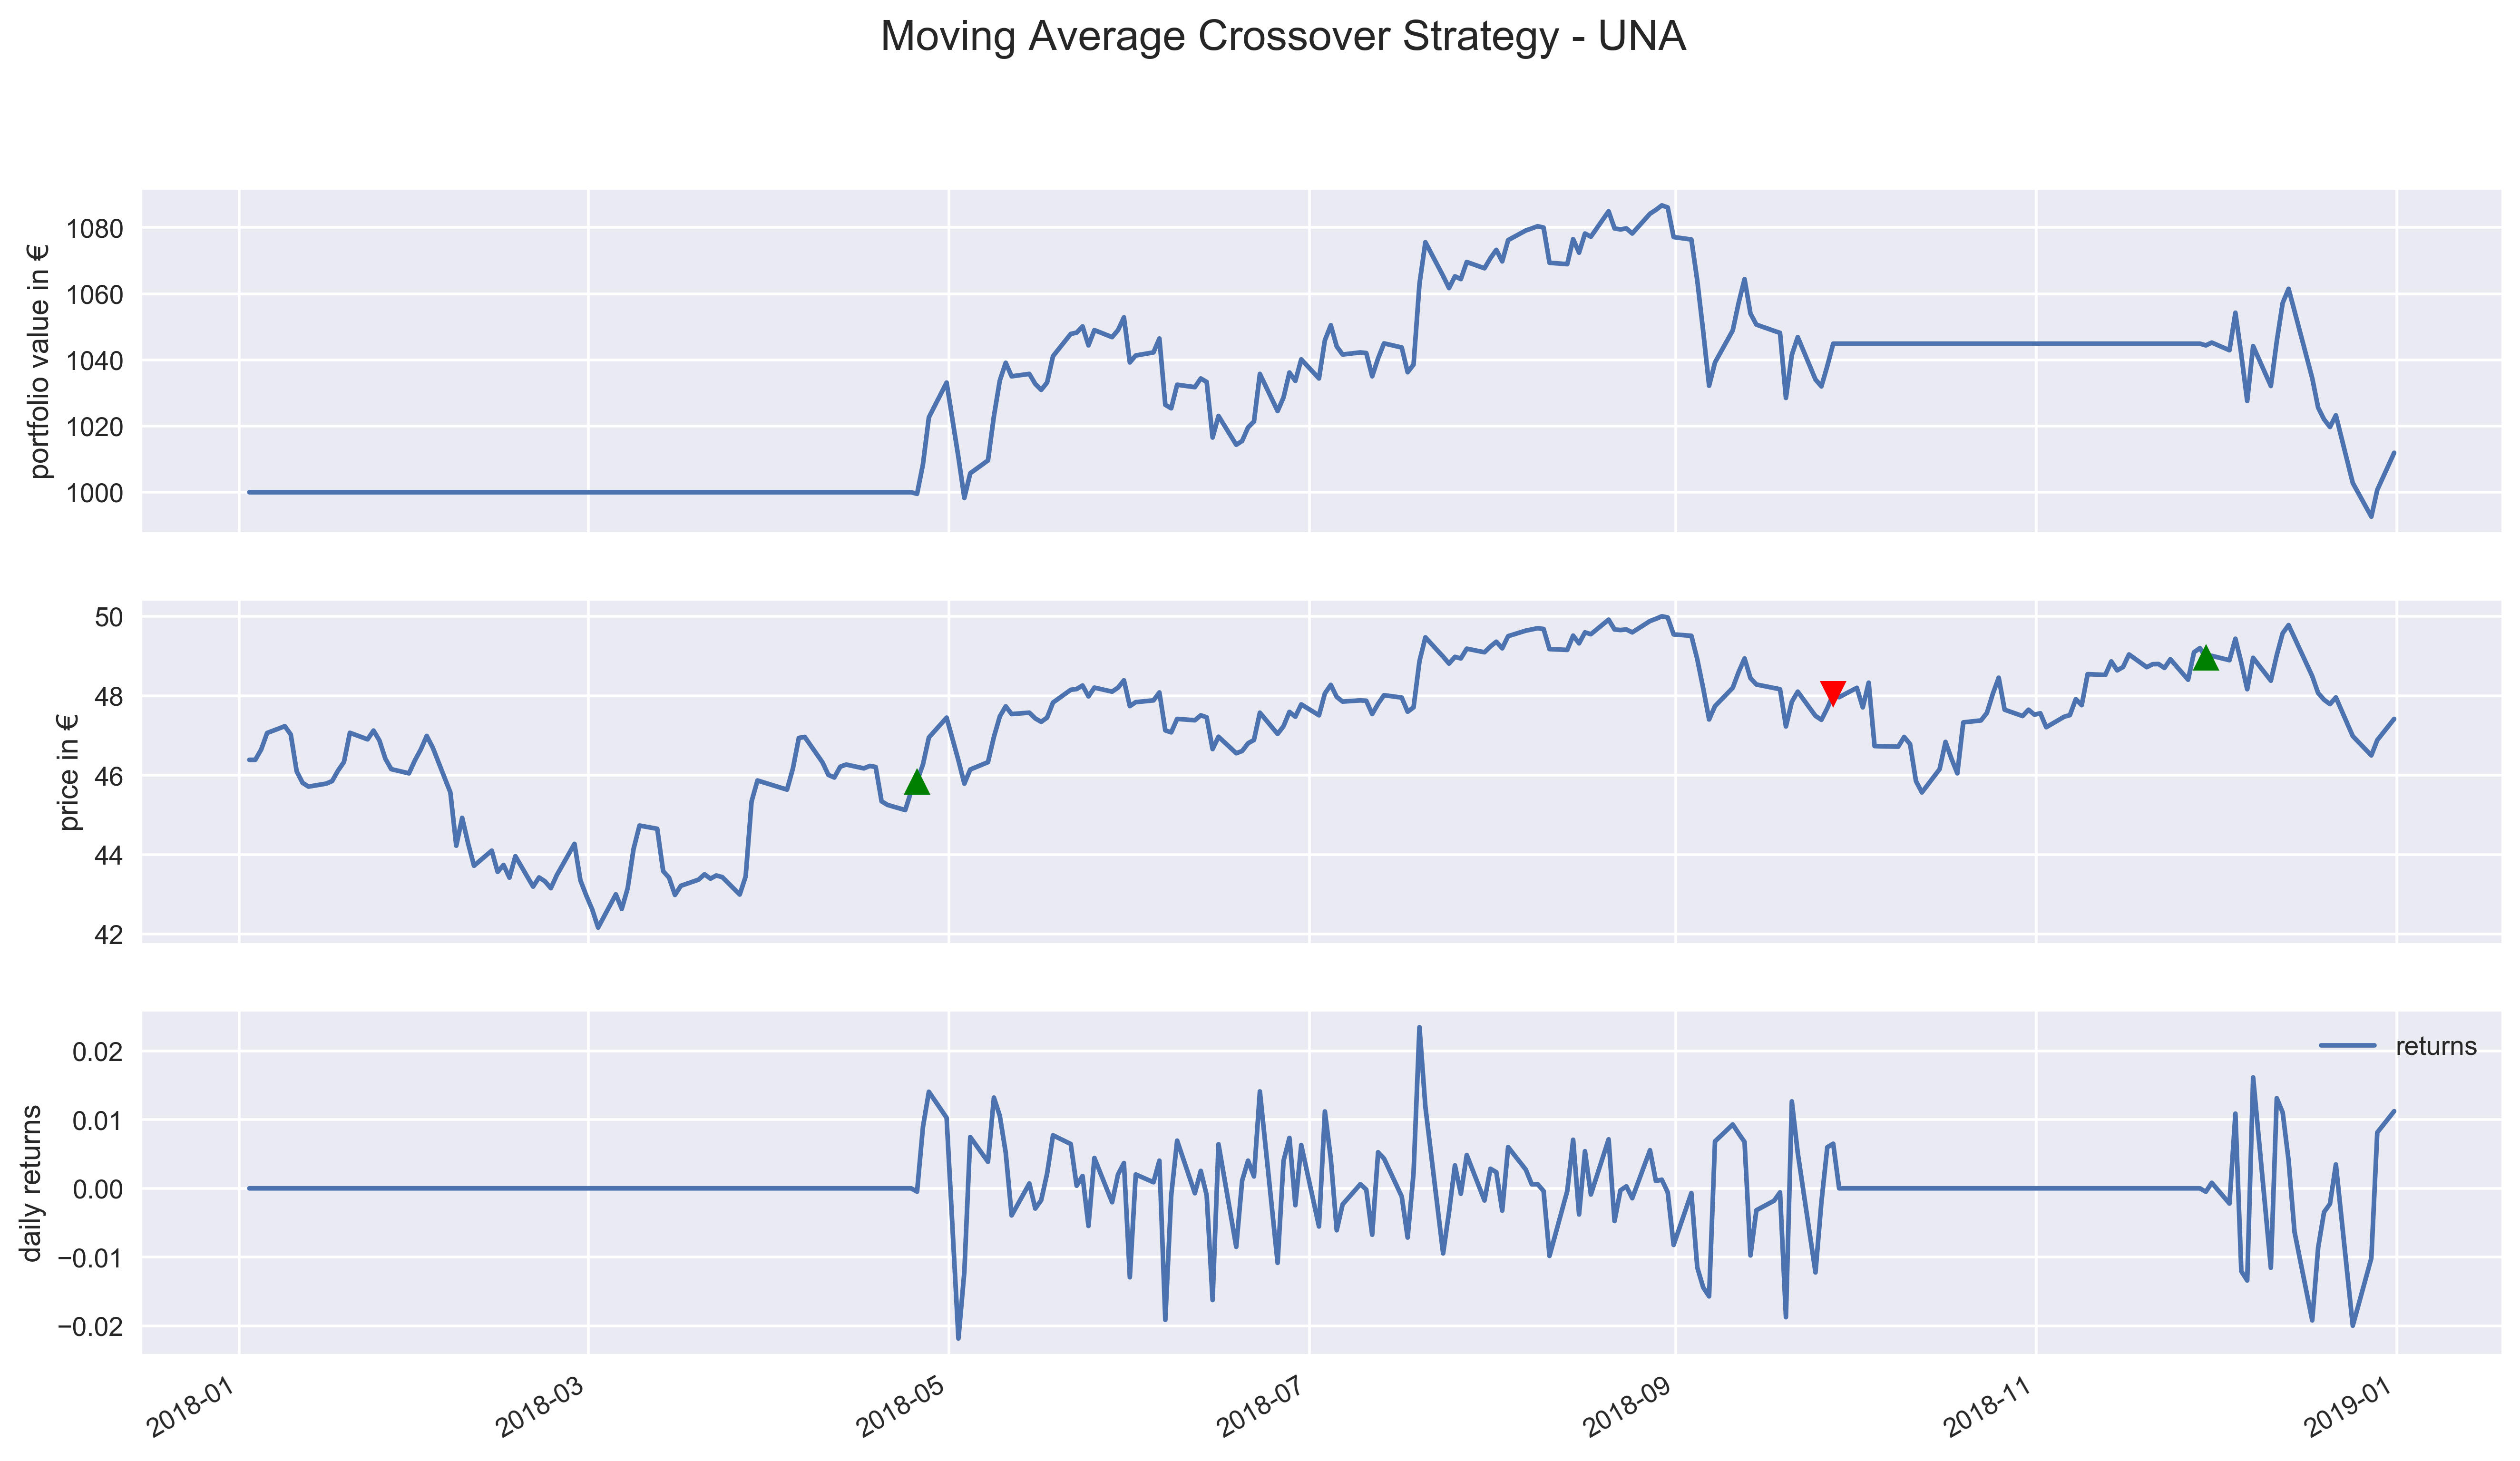

Final portfolio value (including cash): 1011.92€


In [23]:
qf.visualize_results(mac_results, 'Moving Average Crossover Strategy - UNA', '€')

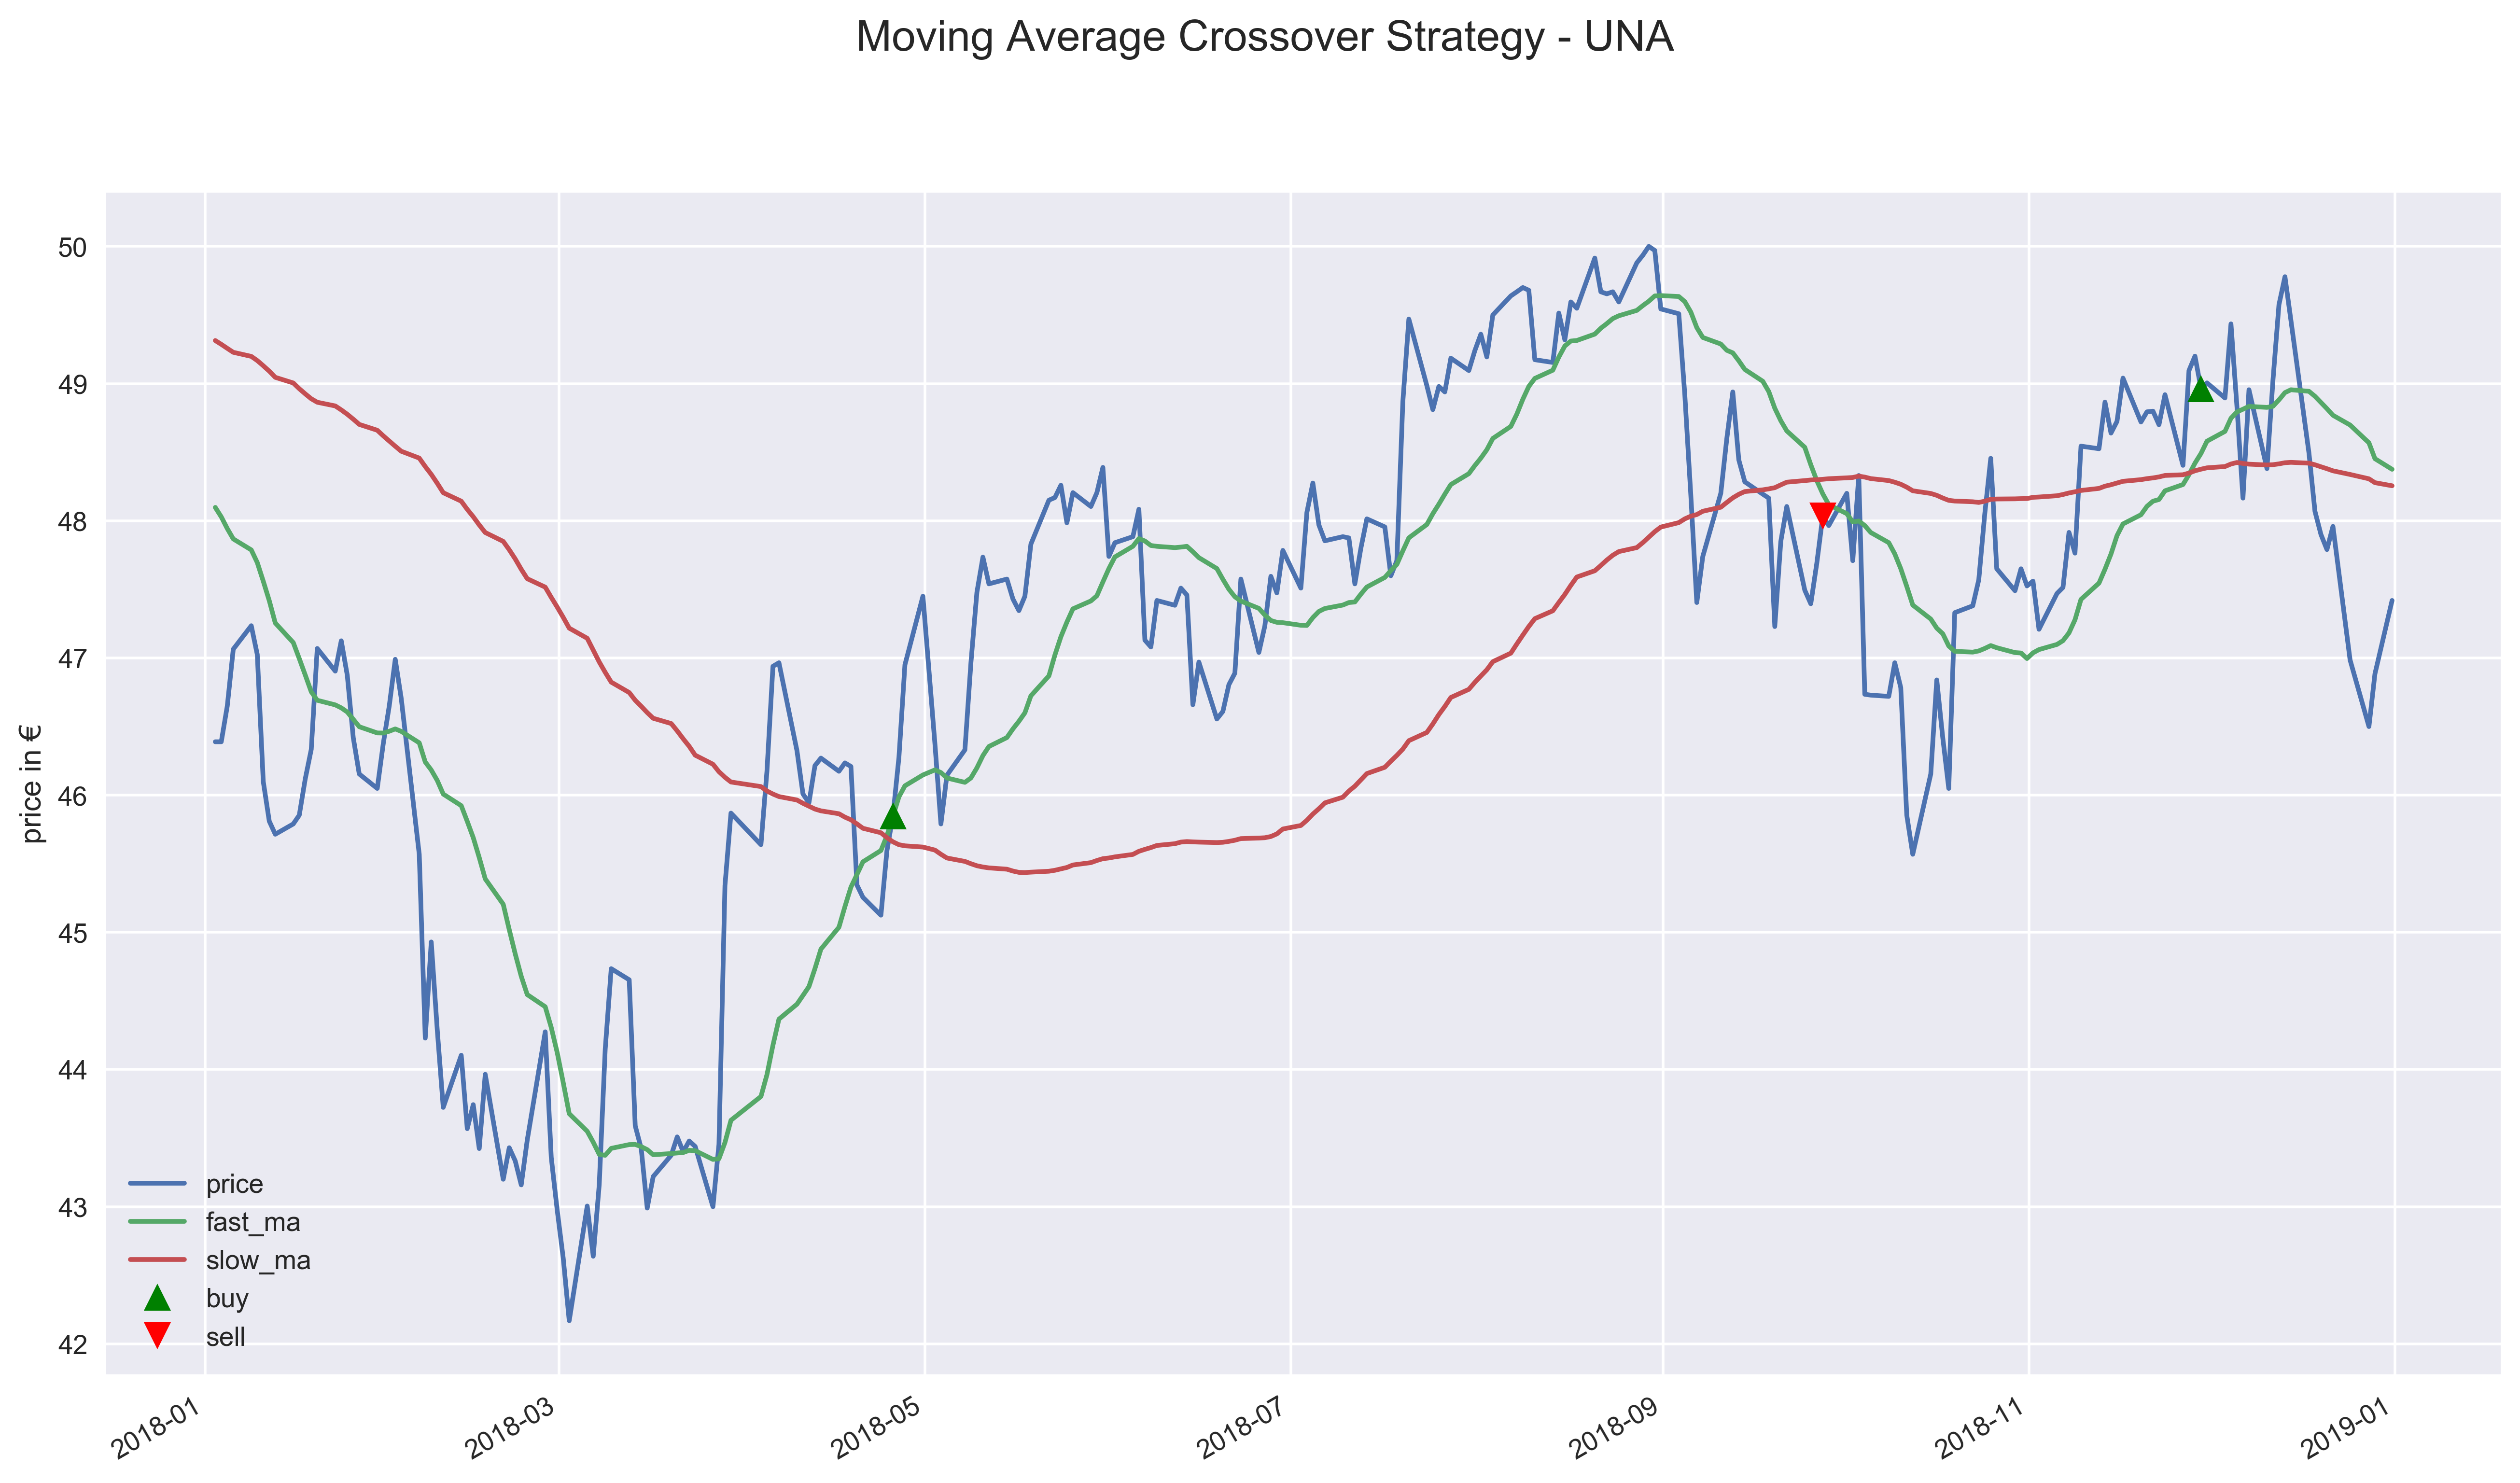

In [24]:
fig, ax = plt.subplots()

# asset
mac_results[['price', 'fast_ma', 'slow_ma']].plot(ax=ax)
ax.set_ylabel('price in €')

# mark transactions
perf_trans = mac_results.loc[[t != [] for t in mac_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, mac_results.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax.plot(sells.index, mac_results.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax.legend()

fig.suptitle('Moving Average Crossover Strategy - UNA', fontsize=16)
plt.legend()
plt.show()

In [25]:
mac_perf = qf.get_performance_summary(mac_results.returns)

In [26]:
# MACD Strategy

In [28]:
%%zipline --start 2018-1-1 --end 2018-12-31 --capital-base 1000.0 -o macd.pkl --bundle eu_stocks_algo --trading-calendar XAMS

# imports ----
from zipline.api import order_target, record, symbol, set_commission, order_percent
import matplotlib.pyplot as plt
import talib as ta
from zipline.finance import commission

# parameters ----
SELECTED_STOCK = 'UNA'

 #initialize the strategy 
def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = False
    
def handle_data(context, data):
    
    price_history = data.history(context.asset, fields="price", bar_count=34, frequency="1d")
    macd, macdsignal, macdhist = ta.MACD(price_history.values, 12, 26, 9) 
    
    if (macdsignal[-1] < macd[-1]) and (not context.has_position):
        order_percent(context.asset, 1.0)
        context.has_position = True
        
    if (macdsignal[-1] > macd[-1]) and (context.has_position):
        order_target(context.asset, 0)
        context.has_position = False
        
    record(macd =  macd[-1], macdsignal = macdsignal[-1], macdhist = macdhist[-1], price=price_history[-1])

C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


algo_volatility  algorithm_period_return alpha  \
2018-01-02 16:30:00+00:00              NaN                 0.000000  None   
2018-01-03 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-04 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-05 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-08 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-09 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-10 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-11 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-12 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-15 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-16 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-17 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-18 16:30:00+00:00         0.000000                 0.000000  None   
2018-01-19 16:30:00+00:00         0.002097                -0.000494  None   
2018-01-22 16:30:00+00:00         0.014209                -0.003959  None   
2018-01-23 16:30:00+00:00         0.023880                 0.000682  None   
2018-01-24 16:30:00+00:00         0.030813                -0.004568  None   
2018-01-25 16:30:00+00:00         0.046023                -0.014144  None   
2018-01-26 16:30:00+00:00         0.048098                -0.019709  None   
2018-01-29 16:30:00+00:00         0.047011                -0.021914  None   
2018-01-30 16:30:00+00:00         0.053734                -0.015068  None   
2018-01-31 16:30:00+00:00         0.056972                -0.009293  None   
2018-02-01 16:30:00+00:00         0.061118                -0.002153  None   
2018-02-02 16:30:00+00:00         0.062768                -0.008138  None   
2018-02-05 16:30:00+00:00         0.097193                -0.031994  None   
2018-02-06 16:30:00+00:00         0.128659                -0.060134  None   
2018-02-07 16:30:00+00:00         0.137034                -0.045885  None   
2018-02-08 16:30:00+00:00         0.134570                -0.045885  None   
2018-02-09 16:30:00+00:00         0.132233                -0.045885  None   
2018-02-12 16:30:00+00:00         0.130015                -0.045885  None   
...                                    ...                      ...   ...   
2018-11-16 16:30:00+00:00         0.109179                -0.005020  None   
2018-11-19 16:30:00+00:00         0.109148                -0.011420  None   
2018-11-20 16:30:00+00:00         0.108919                -0.009940  None   
2018-11-21 16:30:00+00:00         0.108680                -0.010328  None   
2018-11-22 16:30:00+00:00         0.108443                -0.010328  None   
2018-11-23 16:30:00+00:00         0.108207                -0.010328  None   
2018-11-26 16:30:00+00:00         0.107972                -0.010328  None   
2018-11-27 16:30:00+00:00         0.107739                -0.010328  None   
2018-11-28 16:30:00+00:00         0.107508                -0.010328  None   
2018-11-29 16:30:00+00:00         0.107278                -0.010328  None   
2018-11-30 16:30:00+00:00         0.107049                -0.010328  None   
2018-12-03 16:30:00+00:00         0.106822                -0.010328  None   
2018-12-04 16:30:00+00:00         0.106597                -0.010328  None   
2018-12-05 16:30:00+00:00         0.106373                -0.010328  None   
2018-12-06 16:30:00+00:00         0.106150                -0.010328  None   
2018-12-07 16:30:00+00:00         0.105929                -0.010328  None   
2018-12-10 16:30:00+00:00         0.105709                -0.010328  None   
2018-12-11 16:30:00+00:00         0.105490                -0.010328  None   
2018-12-12 16:30:00+00:00         0.105273                -0.010328  None   
2018-12-13 16:30:00+00:00         0.105057                -0.010328  None   
2018-12-14 16:30:00+00:

In [29]:
macd_results = pd.read_pickle('macd.pkl')

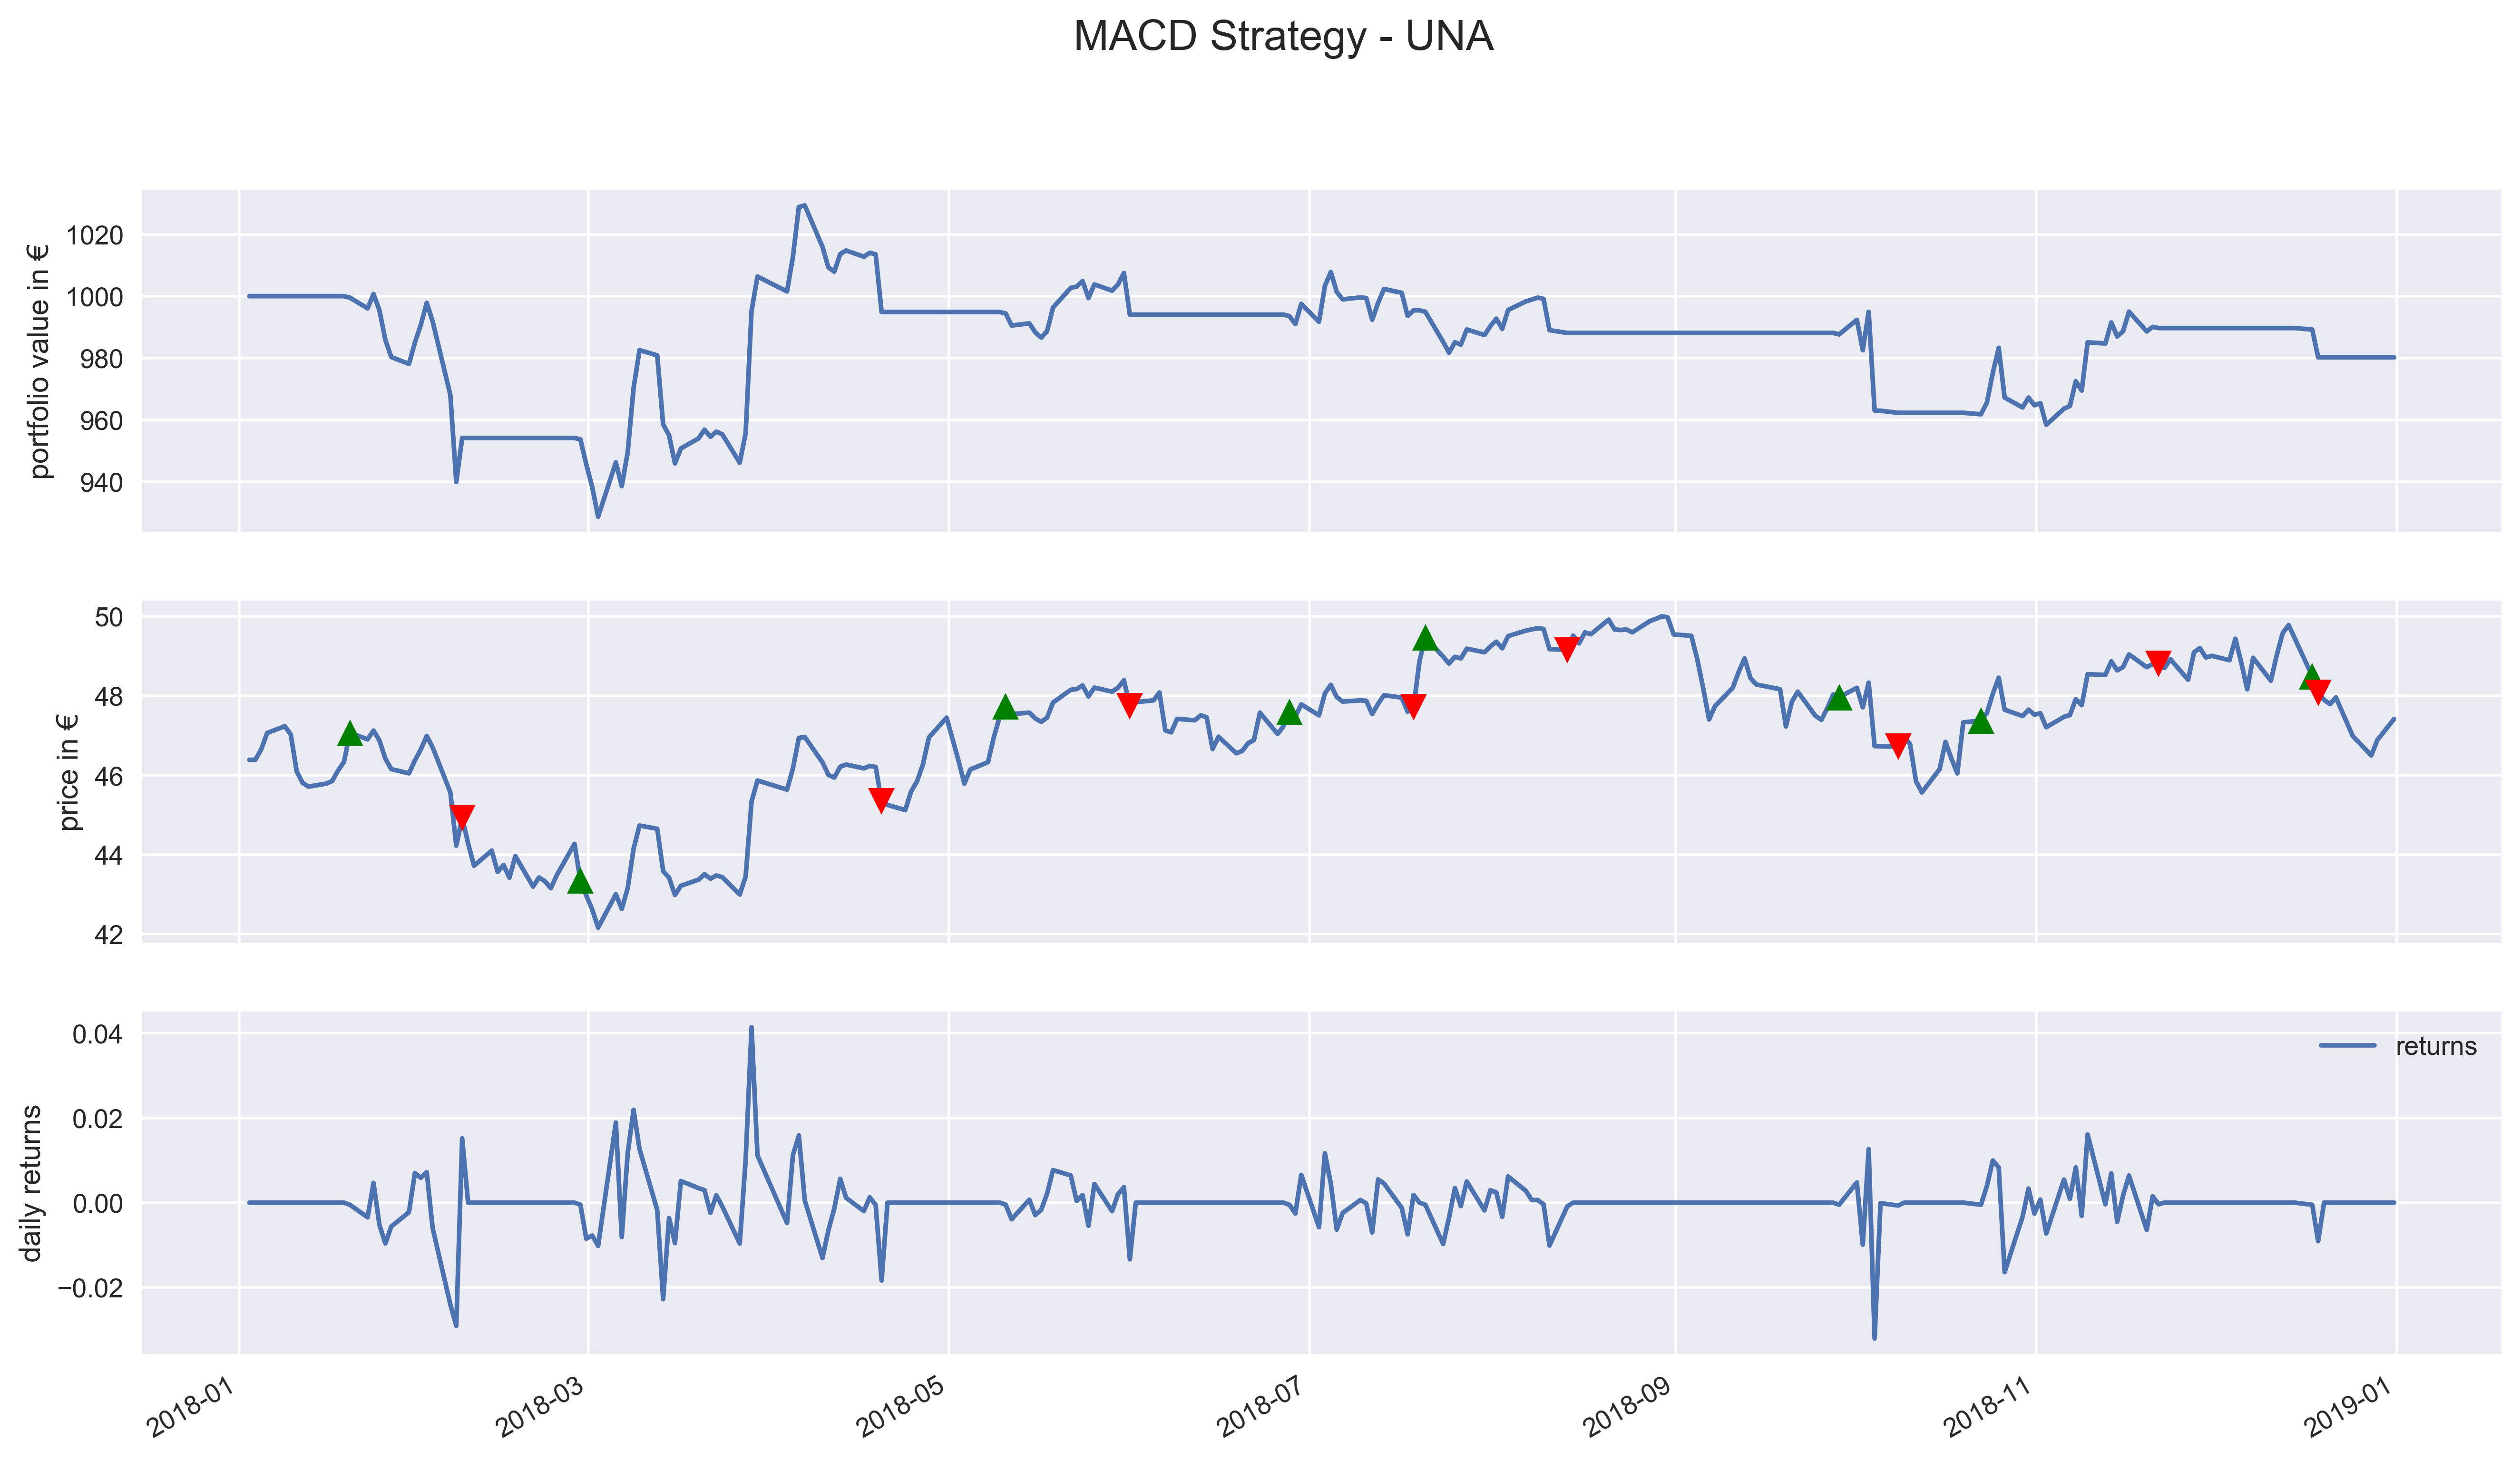

Final portfolio value (including cash): 980.21€


In [31]:
qf.visualize_results(macd_results, 'MACD Strategy - UNA', '€')

In [32]:

# asset
macd_results[['macd', 'macdsignal']].plot(ax=ax)
ax.set_ylabel('price in €')

# mark transactions
perf_trans = macd_results.loc[[t != [] for t in macd_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, macd_results.macd.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax.plot(sells.index, macd_results.macd.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax.legend()

fig.suptitle('MACD Strategy - UNA', fontsize=16)
plt.show()

In [33]:
macd_perf = qf.get_performance_summary(macd_results.returns)

In [34]:
# RSI STrategy

In [35]:
%%zipline --start 2018-1-1 --end 2018-12-31 --capital-base 1000.0 -o rsi.pkl --bundle eu_stocks_algo --trading-calendar XAMS

# imports ----
from zipline.api import order_target, record, symbol, set_commission, order_percent
import matplotlib.pyplot as plt
import talib as ta
from zipline.finance import commission

# parameters ----
SELECTED_STOCK = 'UNA'
UPPER = 70
LOWER = 30
RSI_PERIOD = 14

#initialize the strategy 
def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = False
    
def handle_data(context, data):
    
    price_history = data.history(context.asset, fields="price", bar_count=RSI_PERIOD+1, frequency="1d")
    rsi = ta.RSI(price_history, timeperiod=RSI_PERIOD)
    
    if rsi[-1] < LOWER and not context.has_position:
        order_percent(context.asset, 1.0)
        context.has_position = True
      
    if rsi[-1] > UPPER and context.has_position:
        order_target(context.asset, 0)
        context.has_position = False
     
    record(rsi=rsi[-1], price=price_history[-1])

ValueError: SQLite file 'C:\\Users\\Sela#/.zipline\\data\\eu_stocks\\2019-11-21T18;06;08.010583\\assets-6.sqlite' doesn't exist.

In [ ]:
rsi_results = pd.read_pickle('rsi.pkl')

In [ ]:

qf.visualize_results(rsi_results, 'RSI Strategy - UNA', '€')

In [ ]:
#fig, ax = plt.subplots(1, 1, sharex=True, figsize=[16, 9])
fig, ax = plt.subplots()

# asset
rsi_results[['rsi']].plot(ax=ax)
ax.axhline(y=70, color='r')
ax.axhline(y=30, color='g')

# mark transactions
perf_trans = rsi_results.loc[[t != [] for t in rsi_results.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, rsi_results.rsi.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax.plot(sells.index, rsi_results.rsi.loc[sells.index], 'v', markersize=10, color='r', label='sell')
ax.legend()

fig.suptitle('RSI Strategy - UNA', fontsize=16)
plt.show()

In [ ]:
rsi_perf = qf.get_performance_summary(rsi_results.returns)